In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/zomato_pune_V002.csv')

In [3]:
df.shape

(12189, 104)

In [4]:
mylist = df.columns.values.tolist()

print(mylist)

['Restaurant_Name', 'Web_Link', 'Locality', 'Sponsored', 'Ratings_out_of_5', 'Number of votes', 'Phone_number', 'Cuisines', 'Charges_for_two', 'payment_modes', 'Rest_timming', 'Detail_address', '5_star_review_percentage', '4_star_review_percentage', '3_star_review_percentage', '2_star_review_percentage', '1_star_review_percentage', 'Wine and Beer', 'Dance Floor', 'Lunch Menu', 'Outdoor Seating', 'Seaside', '4/5 Star', 'Free Parking', 'Pet Friendly', 'Bulk Orders Accepted', 'Gaming Are', 'City View', 'Vegetarian Only', 'Brunch', 'Live Music', 'Wheelchair Accessible', 'Home Delivery', 'Celebrity Frequented', 'Pre-Ordering Required', 'Pool Table', 'Keto Options', 'Wifi', 'Sports TV', 'Wine Tasting', 'Beer', 'Restricted Entry', 'Variable Menu', 'Serves Non Veg', 'Table booking for Groups', 'Poolside', 'Home Baker', 'Wine', 'Buffet', 'Board Games', 'Vegan Options', 'Table Reservation Not Required', 'Table reservation required', 'Rooftop', 'BYOB', 'Egg Preparations', 'Live Sports Screening',

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12189 entries, 0 to 12188
Columns: 104 entries, Restaurant_Name to spam_review
dtypes: float64(1), int64(86), object(17)
memory usage: 9.7+ MB


In [6]:
df.isnull().sum()

Restaurant_Name      0
Web_Link             0
Locality             0
Sponsored            0
Ratings_out_of_5     0
                    ..
Disabled Friendly    0
Serves Halal         0
Takeaway Only        0
BYOB Only            0
spam_review          0
Length: 104, dtype: int64

In [7]:
df = df.drop(['Web_Link', 'Phone_number','Wheelchair Accessible','Sports TV','Poolside','Table Reservation Not Required','Live Sports Screening','Available for Functions','Above 18 Only'],axis=1)
df

,Restaurant_Name,Locality,Sponsored,Ratings_out_of_5,Number of votes,Cuisines,Charges_for_two,payment_modes,Rest_timming,Detail_address,...,Table booking recommended,Resto Bar,Serves Alcohol,Breakfast,Catering Available,Disabled Friendly,Serves Halal,Takeaway Only,BYOB Only,spam_review
0,AB's - Absolute Barbecues,Hinjawadi,Casual Dining,4.9,7029 votes,"Continental, North Indian, Chinese","₹1,400",Cash and Cards accepted,"12noon – 4:30pm, 6:30pm – 11:30pm","Shop 206, 2nd Floor, White Square Building, Op...",...,1,0,0,0,0,0,0,0,0,1539.0
1,Cafe Co2 Resto Lounge,Bhugaon,"Lounge, Casual Dining",4.6,2578 votes,"North Indian, Chinese, Continental, Kebab, Sea...","₹1,500",Cash and Cards accepted,11am – 4am,"Near Manas Lake, Bhugaon, Pune",...,1,0,0,0,0,0,0,0,0,139.0
2,Paasha - JW Marriott Pune,Senapati Bapat Road,Fine Dining,4.6,3291 votes,"North Indian, Kebab, Biryani","₹2,500","Cash,Cards and Digital Payments accepted",5:30pm – 12:30am,"JW Marriott, Senapati Bapat Road, Pune",...,1,0,0,0,0,0,0,0,0,119.0
3,I Amsterdam,Hinjawadi,"Casual Dining, Bar",4.3,430 votes,"Asian, European, Modern Indian, Italian","₹1,400","Cash,Cards and Digital Payments accepted",12noon – 1am,"Survey 257/1/1A, Near Raj Laxmi Petrol Pump, P...",...,1,0,0,0,0,0,0,0,0,8.0
4,FC Road Social,Shivaji Nagar,"Bar, Casual Dining",4.5,2138 votes,"North Indian, Chinese, Biryani, American, Cont...","₹1,500","Cash,Cards and Digital Payments accepted",9am – 1am,"CTS 1183, Unit 101, 1st Floor, Mezzanine Floor...",...,0,0,0,1,0,0,0,0,0,132.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12184,Nil Food Point,Hinjawadi,"Takeaway, Delivery",0,0,Chinese,Not Present,Cash and Digital Payments accepted,12noon – 1am,"Survey 274/4, Mukai Nagar, Hinjawadi, Pune",...,0,0,0,0,0,0,0,0,0,0.0
12185,Flirty Momo,Kharadi,"Takeaway, Delivery",0,0,"Mongolian, Pizza, Chinese, Beverages",Not Present,Cash only,2pm – 4am,"Survry 21/3, Lane 2, Raghoba Patil Nagar, Shre...",...,0,0,0,0,0,0,0,0,0,0.0
12186,Hunger Treat,Katraj,Quick Bites,0,0,"South Indian, Fast Food, Chinese",₹300,Cash and Digital Payments accepted,11am – 11pm,"Shop 22, Survey 34, Ground Floor, Abhijeet S R...",...,0,0,0,0,0,0,0,0,0,0.0
12187,Bungalow 424,Kothrud,"Casual Dining, Bar",0,0,"North Indian, Fast Food, Continental","₹1,200","Cash,Cards and Digital Payments accepted",11am – 11:30pm,"CTS 423-426, Karve Road, Near Karve Statue, Ko...",...,1,0,0,0,0,0,0,0,0,0.0


In [8]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.shape

(12134, 95)

In [9]:
df = df.rename(columns={'Charges_for_two':'cost','Ratings_out_of_5':'Ratings'})
print(df.columns)

Index(['Restaurant_Name', 'Locality', 'Sponsored', 'Ratings',
       'Number of votes', 'Cuisines', 'cost', 'payment_modes', 'Rest_timming',
       'Detail_address', '5_star_review_percentage',
       '4_star_review_percentage', '3_star_review_percentage',
       '2_star_review_percentage', '1_star_review_percentage', 'Wine and Beer',
       'Dance Floor', 'Lunch Menu', 'Outdoor Seating', 'Seaside', '4/5 Star',
       'Free Parking', 'Pet Friendly', 'Bulk Orders Accepted', 'Gaming Are',
       'City View', 'Vegetarian Only', 'Brunch', 'Live Music', 'Home Delivery',
       'Celebrity Frequented', 'Pre-Ordering Required', 'Pool Table',
       'Keto Options', 'Wifi', 'Wine Tasting', 'Beer', 'Restricted Entry',
       'Variable Menu', 'Serves Non Veg', 'Table booking for Groups',
       'Home Baker', 'Wine', 'Buffet', 'Board Games', 'Vegan Options',
       'Table reservation required', 'Rooftop', 'BYOB', 'Egg Preparations',
       'Luxury Dining', 'Seating Not Available', 'Desserts and Bak

In [10]:
# df['cost'] = df['cost'].astype(str) 
# df['cost'] = df['cost'].apply(lambda x: x.replace(',','.'))

# df.info()

In [11]:
df['Ratings'].unique()

array(['4.9', '4.6', '4.3', '4.5', '4.0', '4.7', '4.2', '4.4', '4.1',
       '3.7', '0', '4.8', '3.9', '3.6', '3.4', '3.8', '2.9', '3.5', '3.2',
       '3.3', '2.1', '2.5', '2.4', '3.0', '3.1', '2.7', '2.6', '2.8',
       '2.3', '-', '2.2', '2.0', '3', '4'], dtype=object)

In [12]:
df.cost.unique()

array(['₹1,400', '₹1,500', '₹2,500', '₹1,700', '₹150', '₹1,300', '₹1,000',
       '₹250', '₹1,800', '₹1,600', '₹700', '₹900', '₹2,000', '₹600',
       '₹1,200', '₹550', '₹2,200', '₹1,100', '₹500', '₹850', '₹300',
       '₹2,100', '₹800', '₹400', '₹450', '₹650', '₹1,250', '₹950', '₹200',
       '₹3,200', '₹350', '₹100', 'Not Present', '₹1,900', '₹3,000',
       '₹750', '₹2,600', '₹2,700', '₹1,050', '₹1,350', '₹4,200', '₹4,000',
       '₹2,00,250', '₹2,400', '₹1,750', '₹3,100', '₹420', '₹1,150',
       '₹1,650', '₹2,900', '₹999', '₹1,950', '₹4,500', '₹280', '₹50',
       '₹1,550', '₹160', '₹110', '₹220', '₹120', '₹15', '₹2,800',
       '₹3,500'], dtype=object)

In [13]:
def Encode(df):
    for column in df.columns [~df.columns.isin(['Ratings','cost','Number of votes'])]:
        df[column].factorize()[0]
    return df

zomato_en = Encode(df.copy())
zomato_en.head()

,Restaurant_Name,Locality,Sponsored,Ratings,Number of votes,Cuisines,cost,payment_modes,Rest_timming,Detail_address,...,Table booking recommended,Resto Bar,Serves Alcohol,Breakfast,Catering Available,Disabled Friendly,Serves Halal,Takeaway Only,BYOB Only,spam_review
0,AB's - Absolute Barbecues,Hinjawadi,Casual Dining,4.9,7029 votes,"Continental, North Indian, Chinese","₹1,400",Cash and Cards accepted,"12noon – 4:30pm, 6:30pm – 11:30pm","Shop 206, 2nd Floor, White Square Building, Op...",...,1,0,0,0,0,0,0,0,0,1539.0
1,Cafe Co2 Resto Lounge,Bhugaon,"Lounge, Casual Dining",4.6,2578 votes,"North Indian, Chinese, Continental, Kebab, Sea...","₹1,500",Cash and Cards accepted,11am – 4am,"Near Manas Lake, Bhugaon, Pune",...,1,0,0,0,0,0,0,0,0,139.0
2,Paasha - JW Marriott Pune,Senapati Bapat Road,Fine Dining,4.6,3291 votes,"North Indian, Kebab, Biryani","₹2,500","Cash,Cards and Digital Payments accepted",5:30pm – 12:30am,"JW Marriott, Senapati Bapat Road, Pune",...,1,0,0,0,0,0,0,0,0,119.0
3,I Amsterdam,Hinjawadi,"Casual Dining, Bar",4.3,430 votes,"Asian, European, Modern Indian, Italian","₹1,400","Cash,Cards and Digital Payments accepted",12noon – 1am,"Survey 257/1/1A, Near Raj Laxmi Petrol Pump, P...",...,1,0,0,0,0,0,0,0,0,8.0
4,FC Road Social,Shivaji Nagar,"Bar, Casual Dining",4.5,2138 votes,"North Indian, Chinese, Biryani, American, Cont...","₹1,500","Cash,Cards and Digital Payments accepted",9am – 1am,"CTS 1183, Unit 101, 1st Floor, Mezzanine Floor...",...,0,0,0,1,0,0,0,0,0,132.0


In [14]:
# corr = zomato_en.corr(method='kendall')
# plt.figure(figsize=(14,8))
# sns.heatmap(corr, annot=True)
# zomato_en.columns

In [15]:
x = zomato_en.loc[:,:]
y = zomato_en['Ratings']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()

,Restaurant_Name,Locality,Sponsored,Ratings,Number of votes,Cuisines,cost,payment_modes,Rest_timming,Detail_address,...,Table booking recommended,Resto Bar,Serves Alcohol,Breakfast,Catering Available,Disabled Friendly,Serves Halal,Takeaway Only,BYOB Only,spam_review
7111,Hotel De Dhakka,Chinchwad,Quick Bites,-,0,Street Food,₹150,Cash only,7am – 7pm,"Pimpri Chinchawad Link Road, Near Gawade Petro...",...,0,0,0,1,0,0,0,0,0,0.0
2474,Invitation 365,Viman Nagar,Casual Dining,2.9,66 votes,"Chinese, North Indian, Seafood",₹700,Cash and Cards accepted,11am – 12midnight,"SS Plaza, D1/D2 Plot 65, Baker Cummins, Viman ...",...,0,0,0,0,0,0,0,0,0,1.0
6061,Sahil Family Resto Bar,Pimpri,Casual Dining,3.1,Based on 7 votes,"Chinese, North Indian, Seafood, Maharashtrian",₹800,"Cash,Cards and Digital Payments accepted",11am – 11pm,"Near F2 Block, Nehru Nagar, Opposite Telco Mat...",...,0,0,0,0,0,0,0,0,0,0.0
10764,Maa Dha Paratha,Kothrud Area,"Takeaway, Delivery",-,0,North Indian,Not Present,Cash only,10am – 10pm,Kothrud Area,...,0,0,0,0,0,0,0,0,0,0.0
7717,Navaratna Restaurant And Bar,Hadapsar,Quick Bites,-,0,"Chinese, North Indian, Seafood, Hyderabadi",₹400,"Cash,Cards and Digital Payments accepted",10am – 11pm,"Shop 6 & 7, Pearl Square Building, Handewadi R...",...,0,0,0,0,0,0,0,0,0,0.0


In [16]:
y_train.head()

7111       -
2474     2.9
6061     3.1
10764      -
7717       -
Name: Ratings, dtype: object

In [17]:
zomato_en['cost'].unique() 

array(['₹1,400', '₹1,500', '₹2,500', '₹1,700', '₹150', '₹1,300', '₹1,000',
       '₹250', '₹1,800', '₹1,600', '₹700', '₹900', '₹2,000', '₹600',
       '₹1,200', '₹550', '₹2,200', '₹1,100', '₹500', '₹850', '₹300',
       '₹2,100', '₹800', '₹400', '₹450', '₹650', '₹1,250', '₹950', '₹200',
       '₹3,200', '₹350', '₹100', 'Not Present', '₹1,900', '₹3,000',
       '₹750', '₹2,600', '₹2,700', '₹1,050', '₹1,350', '₹4,200', '₹4,000',
       '₹2,00,250', '₹2,400', '₹1,750', '₹3,100', '₹420', '₹1,150',
       '₹1,650', '₹2,900', '₹999', '₹1,950', '₹4,500', '₹280', '₹50',
       '₹1,550', '₹160', '₹110', '₹220', '₹120', '₹15', '₹2,800',
       '₹3,500'], dtype=object)

In [18]:
zomato_en['Locality'].unique() 

array(['Hinjawadi', 'Bhugaon', 'Senapati Bapat Road', 'Shivaji Nagar',
       'Wakad', 'East Street', 'Yerawada', 'Bavdhan', 'Kalyani Nagar',
       'Narhe', 'Bund Garden Road', 'Viman Nagar', 'Magarpatta',
       'Deccan Gymkhana', 'Hadapsar', 'Baner', 'Sus', 'Shivapur',
       'Mundhwa', 'FC Road', 'Kothrud', 'Koregaon Park', 'Erandwane',
       'MG Road', 'Karve Nagar', 'Sadashiv Peth', 'Pune University',
       'JM Road', 'Dhole Patil Road', 'Camp Area', 'Pimple Saudagar',
       'Kharadi', 'Ravet', 'Aundh', 'Nigdi', 'Kondhwa', 'Swargate',
       'Katraj', 'Khadki', 'Salunkhe Vihar Road', 'Law College Road',
       'Pimple Nilakh', 'Pashan', 'Lonavala', 'NIBM Road', 'Balewadi',
       'Dange Chowk', 'SB Road - Aundh', 'Pimpri Chinchwad Area',
       'Wadgaon Sheri', 'Pimpri', 'Wanowrie Kondhwa Area', 'Chinchwad',
       'Chandan Nagar', 'Fatima Nagar', 'Budhwar Peth', 'Warje',
       'Wagholi', 'Akurdi', 'Bibvewadi', 'Rasta Peth', 'KP and Kalyani',
       'Sinhgad Road', 'Model Col

In [19]:
zomato_en['Cuisines'].unique()

array(['Continental, North Indian, Chinese',
       'North Indian, Chinese, Continental, Kebab, Seafood',
       'North Indian, Kebab, Biryani', ..., 'Sandwich, Italian',
       'Mongolian, Pizza, Chinese, Beverages',
       'North Indian, Fast Food, Continental'], dtype=object)

In [20]:
zomato_en['Rest_timming'].unique()

array(['12noon – 4:30pm, 6:30pm – 11:30pm', '11am – 4am',
       '5:30pm – 12:30am', ..., '1pm – 9:30pm',
       '9am – 3pm, 5pm – 10:30pm', '7:30am – 10am, 7pm – 10pm'],
      dtype=object)

In [21]:
# import sys
# !{sys.executable} -m pip install pandas-profiling

In [22]:
# import pandas_profiling
# df.profile_report()

In [23]:
df.cost.replace('Not Present',np.nan,inplace=True)
df.cost.isnull().sum()

2108

In [24]:
df.dropna(how='any',inplace=True,axis=0)
df.cost.isnull().sum()

0

In [25]:
df.shape

(10026, 95)

In [26]:
df.reindex([i for i in range(len(df))])

,Restaurant_Name,Locality,Sponsored,Ratings,Number of votes,Cuisines,cost,payment_modes,Rest_timming,Detail_address,...,Table booking recommended,Resto Bar,Serves Alcohol,Breakfast,Catering Available,Disabled Friendly,Serves Halal,Takeaway Only,BYOB Only,spam_review
0,AB's - Absolute Barbecues,Hinjawadi,Casual Dining,4.9,7029 votes,"Continental, North Indian, Chinese","₹1,400",Cash and Cards accepted,"12noon – 4:30pm, 6:30pm – 11:30pm","Shop 206, 2nd Floor, White Square Building, Op...",...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1539.0
1,Cafe Co2 Resto Lounge,Bhugaon,"Lounge, Casual Dining",4.6,2578 votes,"North Indian, Chinese, Continental, Kebab, Sea...","₹1,500",Cash and Cards accepted,11am – 4am,"Near Manas Lake, Bhugaon, Pune",...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,139.0
2,Paasha - JW Marriott Pune,Senapati Bapat Road,Fine Dining,4.6,3291 votes,"North Indian, Kebab, Biryani","₹2,500","Cash,Cards and Digital Payments accepted",5:30pm – 12:30am,"JW Marriott, Senapati Bapat Road, Pune",...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,119.0
3,I Amsterdam,Hinjawadi,"Casual Dining, Bar",4.3,430 votes,"Asian, European, Modern Indian, Italian","₹1,400","Cash,Cards and Digital Payments accepted",12noon – 1am,"Survey 257/1/1A, Near Raj Laxmi Petrol Pump, P...",...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
4,FC Road Social,Shivaji Nagar,"Bar, Casual Dining",4.5,2138 votes,"North Indian, Chinese, Biryani, American, Cont...","₹1,500","Cash,Cards and Digital Payments accepted",9am – 1am,"CTS 1183, Unit 101, 1st Floor, Mezzanine Floor...",...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,132.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10022,Star 1 Cakes,Hinjawadi,Bakery,2.9,24 votes,Bakery,₹500,Cash and Digital Payments accepted,10am – 11:30pm,"Shop 5, Sakhare Vasti, Gym Road, Near Bendre V...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
10023,Northern Flavours Red Box,Hinjawadi,Quick Bites,3.0,Based on 4 votes,"North Indian, Biryani",₹300,Cash only,"9am – 4pm, 6pm – 11pm","Shop 1, Mukkai Nagar, Hinjawadi, Pune",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10024,Happy Punjabi Dhaba,Pune-Solapur Road,Dhaba,3.0,Based on 4 votes,North Indian,₹400,Cash and Digital Payments accepted,6am – 11:30pm,"Burker Vasti, Pune-Solapur Road, Pune",...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
df['cost'] = df['cost'].str.replace('₹', '')

In [28]:
df['cost'] = df['cost'].apply(lambda x:x.replace(',', ''))
df['cost'] = df['cost'].astype(float)

In [29]:
df['Ratings'] = df['Ratings'].apply(lambda x:x.replace('-','0.0'))
df['Ratings'] = df['Ratings'].astype(float)

df['Ratings'].unique()

array([4.9, 4.6, 4.3, 4.5, 4. , 4.7, 4.2, 4.4, 4.1, 3.7, 0. , 4.8, 3.9,
       3.6, 3.4, 3.8, 2.9, 3.5, 3.2, 3.3, 2.1, 2.5, 2.4, 3. , 2.7, 3.1,
       2.6, 2.8, 2.3, 2.2, 2. ])

# **DATA Visualization**

Text(0.5, 0, 'Number of outlets')

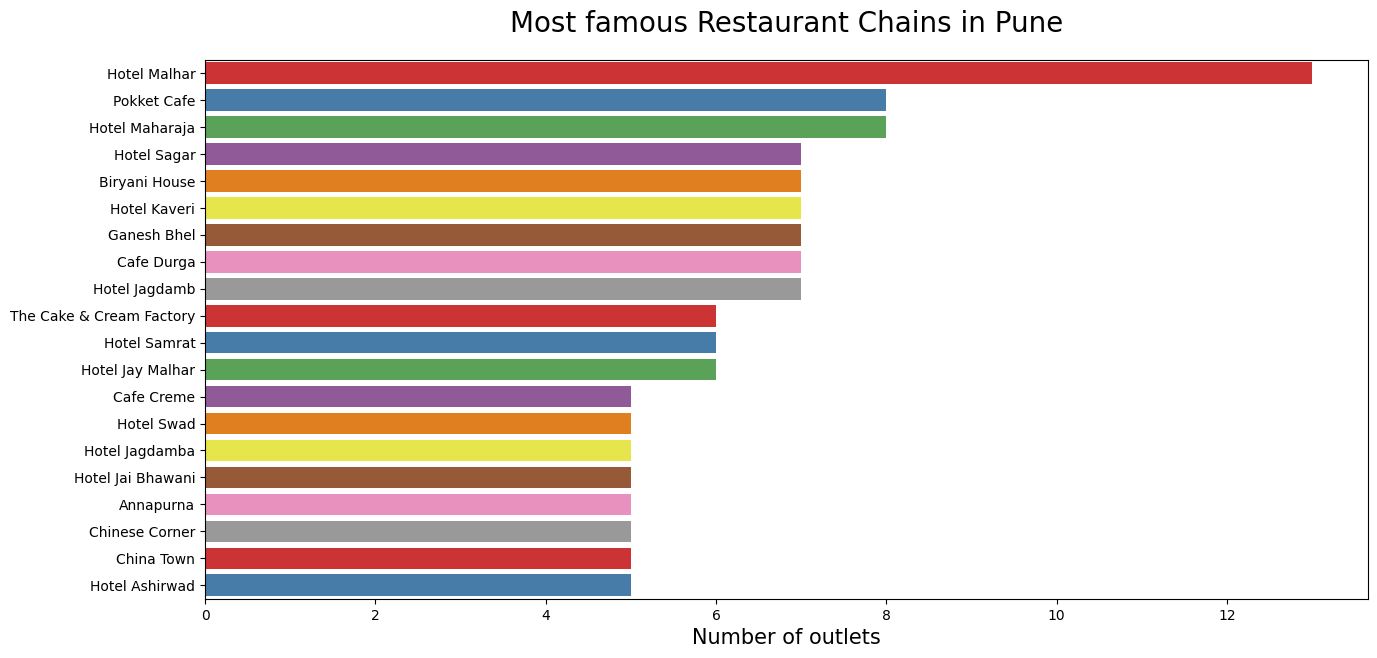

In [30]:
plt.figure(figsize=(15,7))
chains=df['Restaurant_Name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous Restaurant Chains in Pune",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

Text(0.5, 1.0, 'Restaurants Delivering or Not')

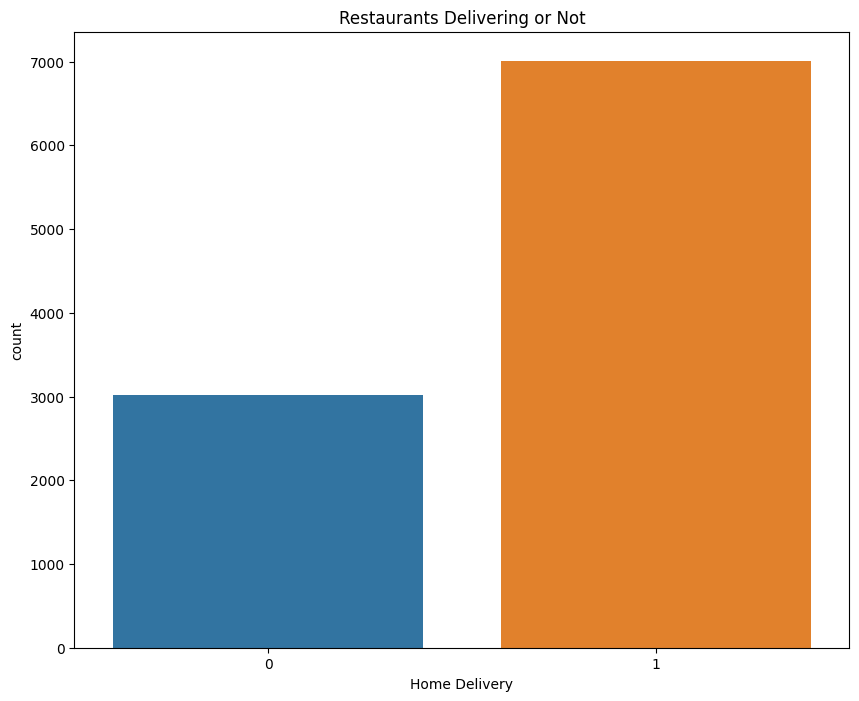

In [31]:
sns.countplot(data=df,x='Home Delivery')
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.title('Restaurants Delivering or Not')

Text(0.5, 1.0, 'Reastaurants serving Jain food')

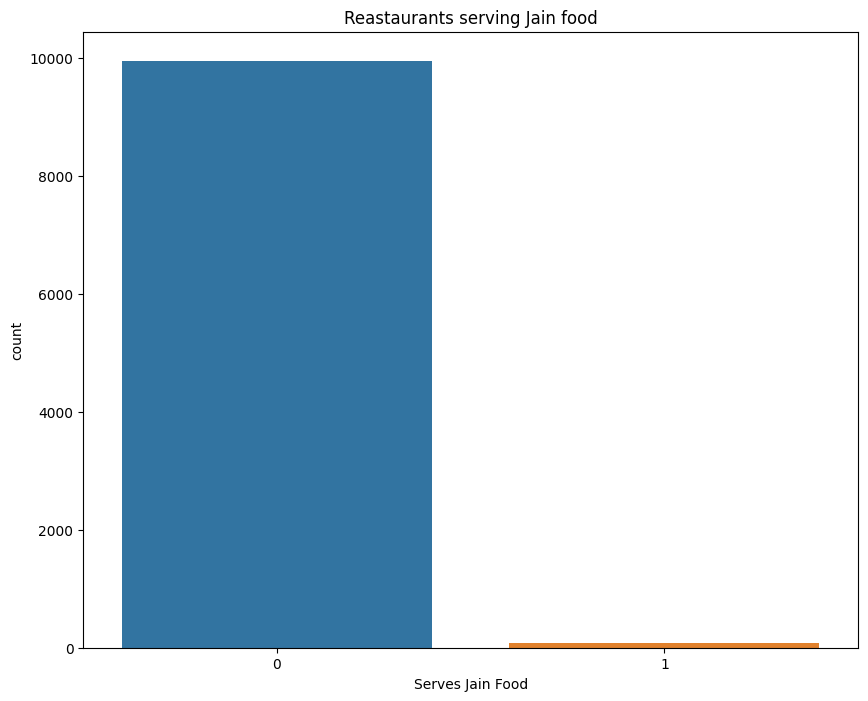

In [32]:
#Restaurants selling Jain food

sns.countplot(data=df,x=df['Serves Jain Food'])
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.title('Reastaurants serving Jain food')

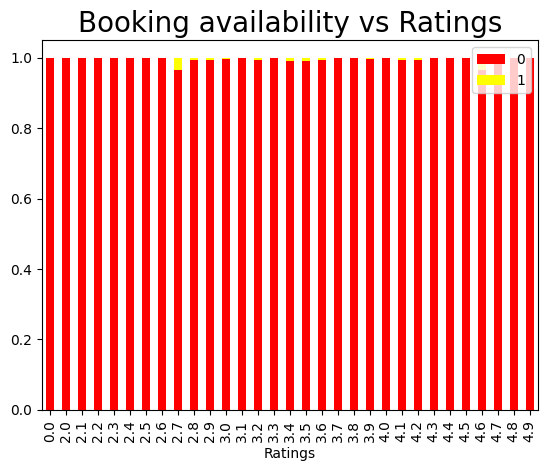

In [33]:
y = pd.crosstab(df['Ratings'], df['Table booking not available'])
y.div(y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['red','yellow' ])
plt.title('Booking availability vs Ratings', fontweight = 30, fontsize = 20)
plt.legend(loc='upper right')
plt.show()

Text(0.5, 1.0, 'Location wise count for restaurants')

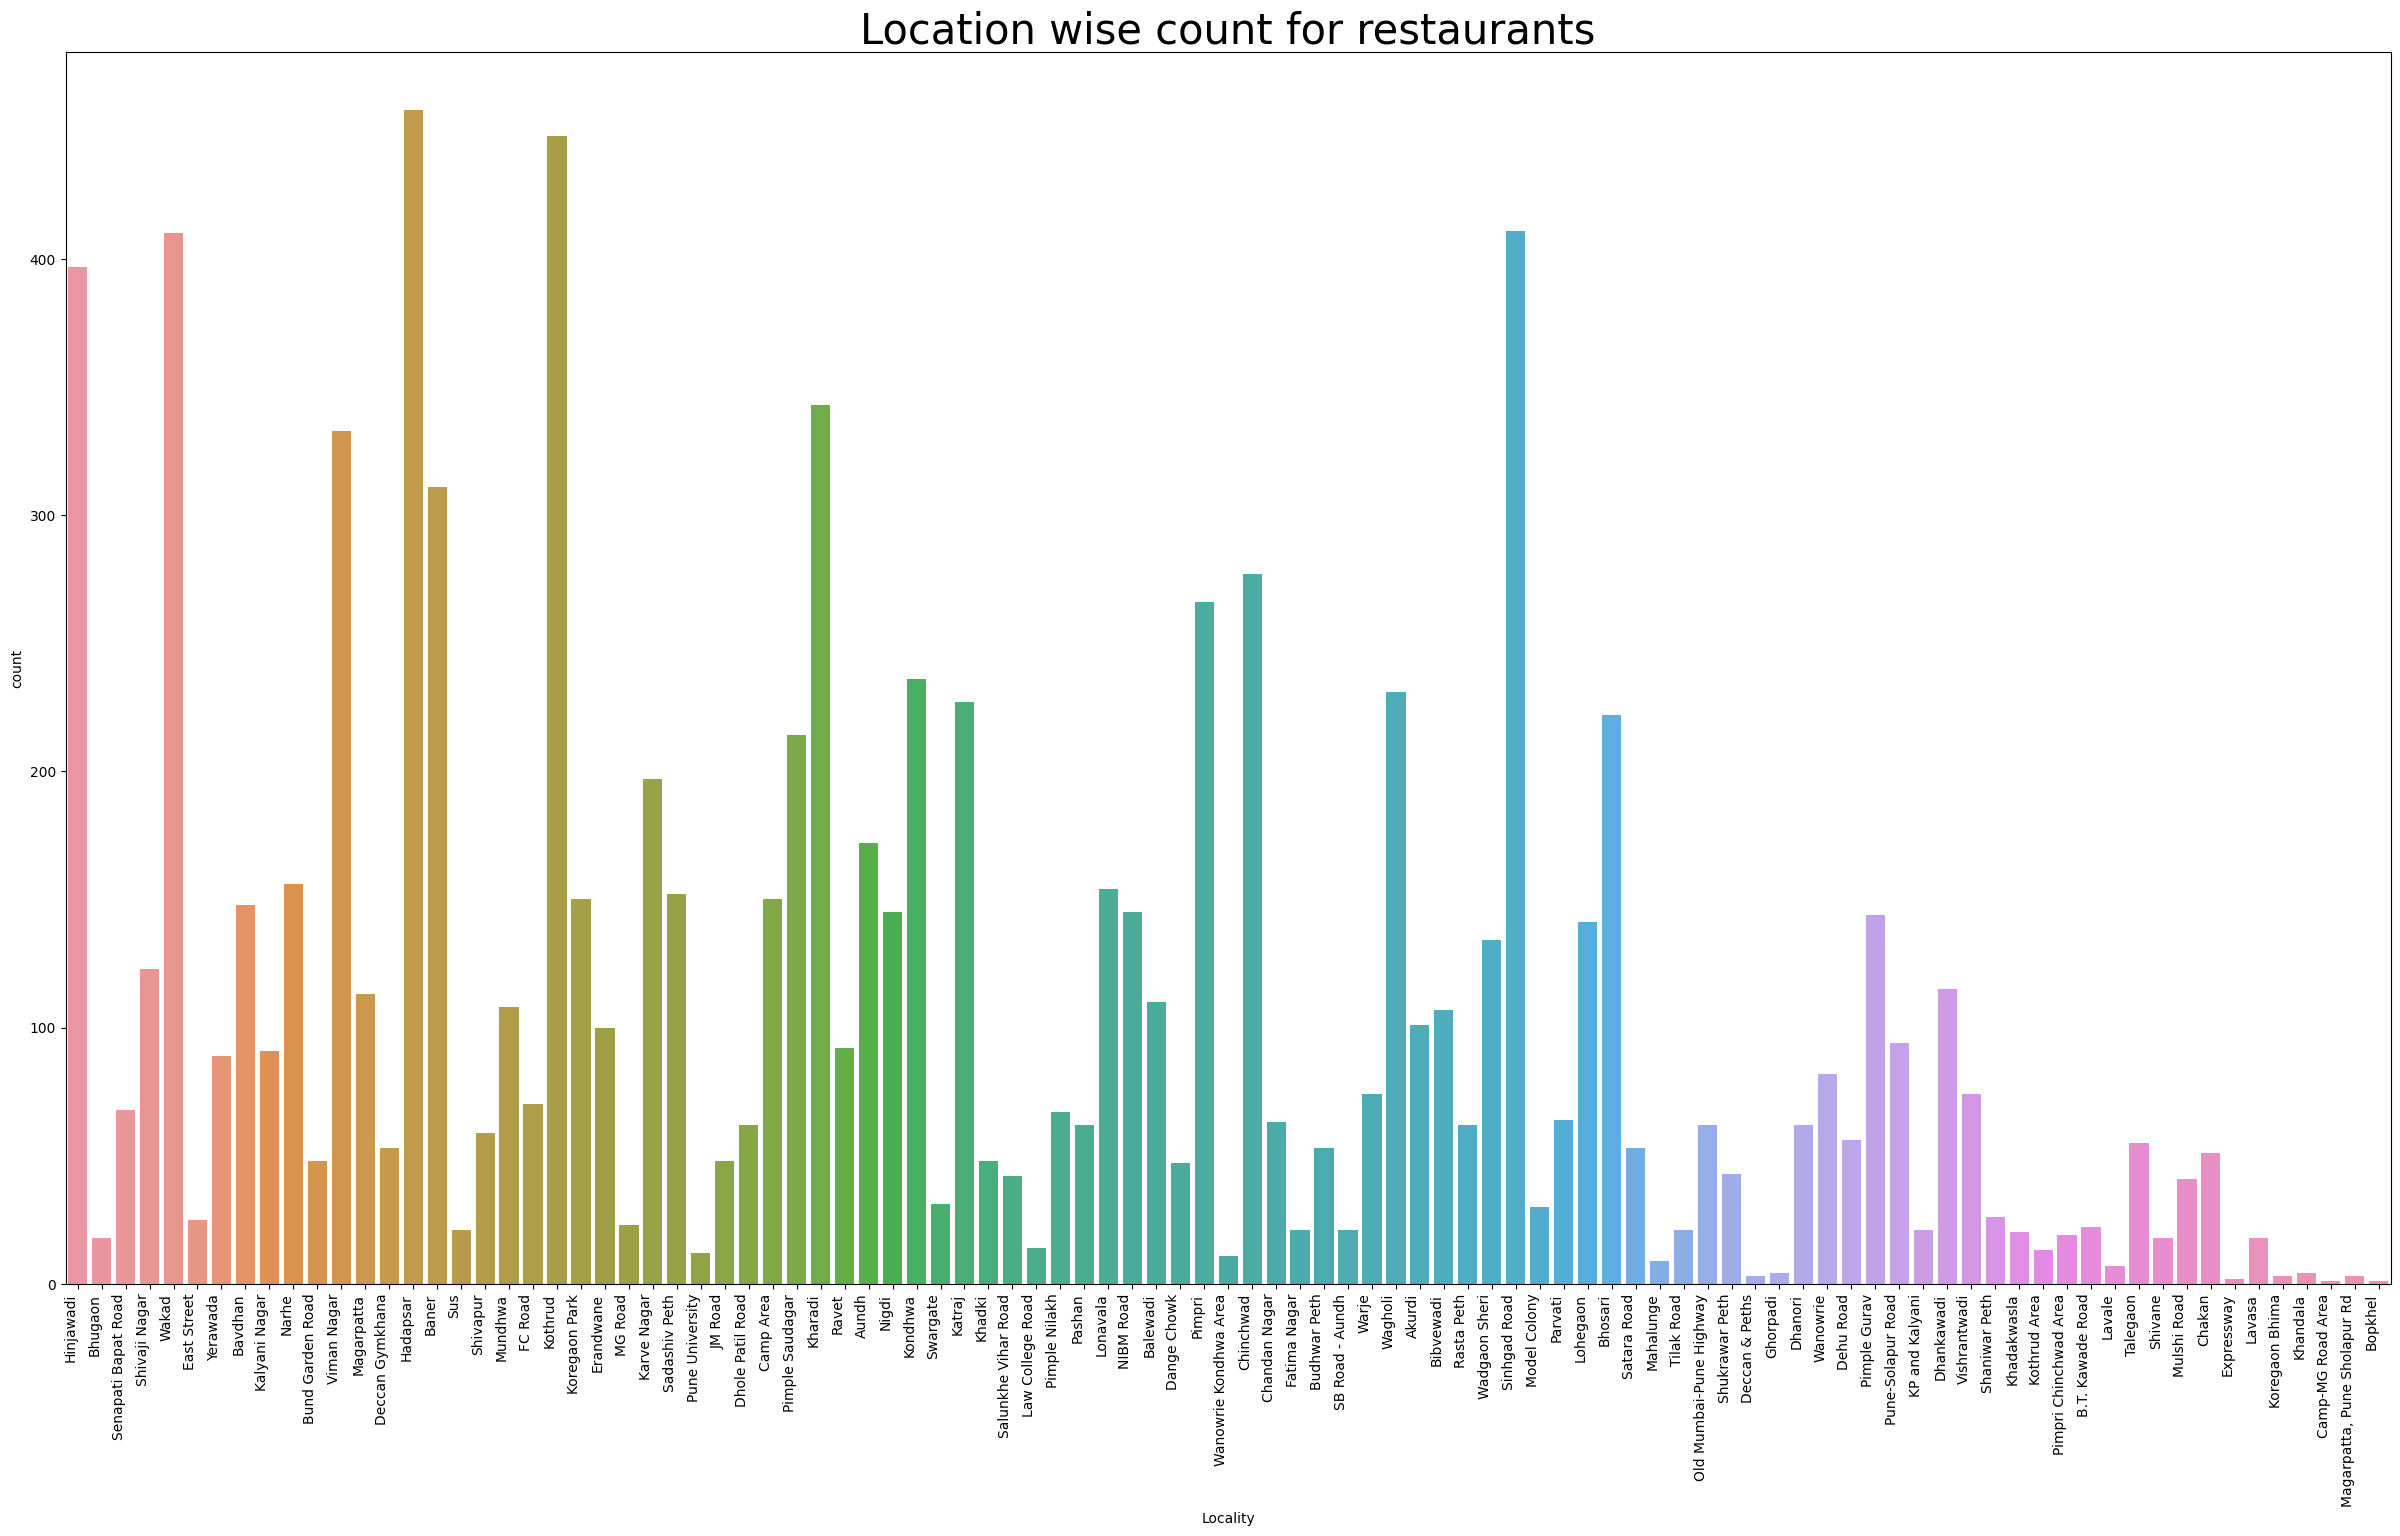

In [34]:
#location
sns.countplot(data=df,x=df['Locality'])
sns.countplot(data=df,x=df['Locality']).set_xticklabels(sns.countplot(data=df,x=df['Locality']).get_xticklabels(), rotation=90, ha='right')
fig = plt.gcf()
fig.set_size_inches(30,16)
plt.title('Location wise count for restaurants',size=30)

Text(0.5, 1.0, 'Restaurant Type')

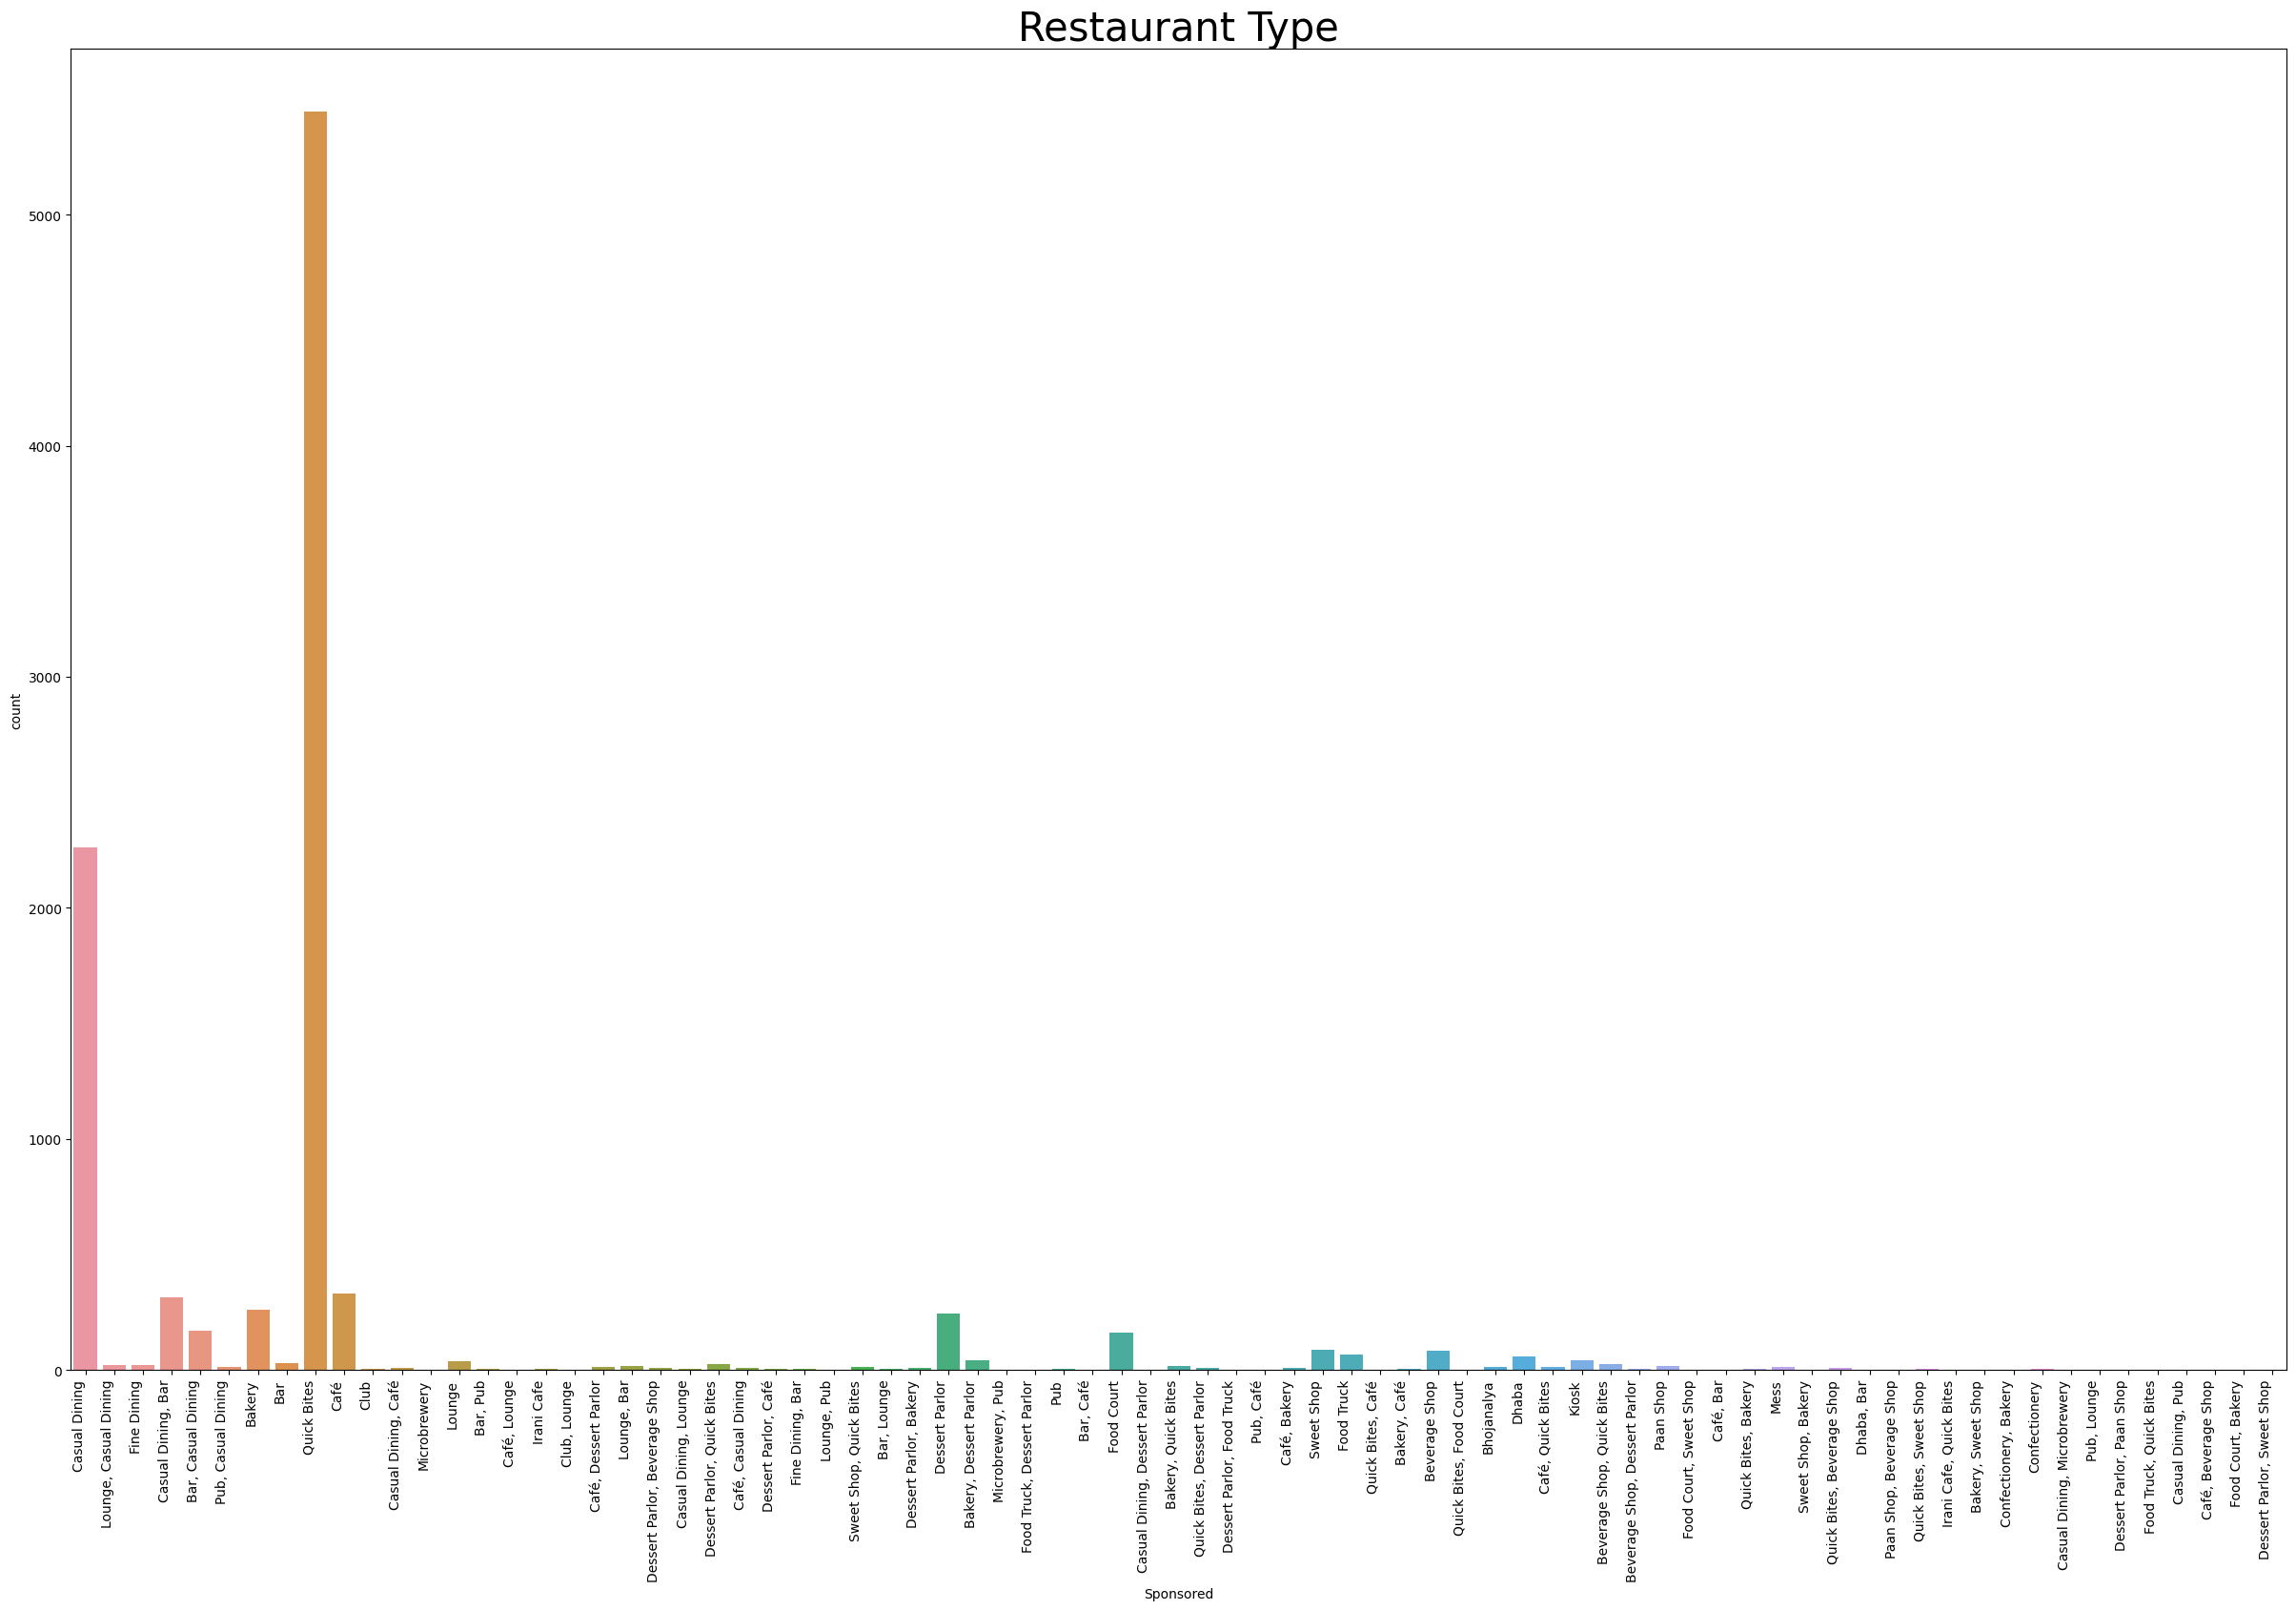

In [35]:
sns.countplot(data=df,x=df['Sponsored'])
sns.countplot(data=df,x=df['Sponsored']).set_xticklabels(sns.countplot(data=df,x=df['Sponsored']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(30,18)
plt.title('Restaurant Type',size=30)

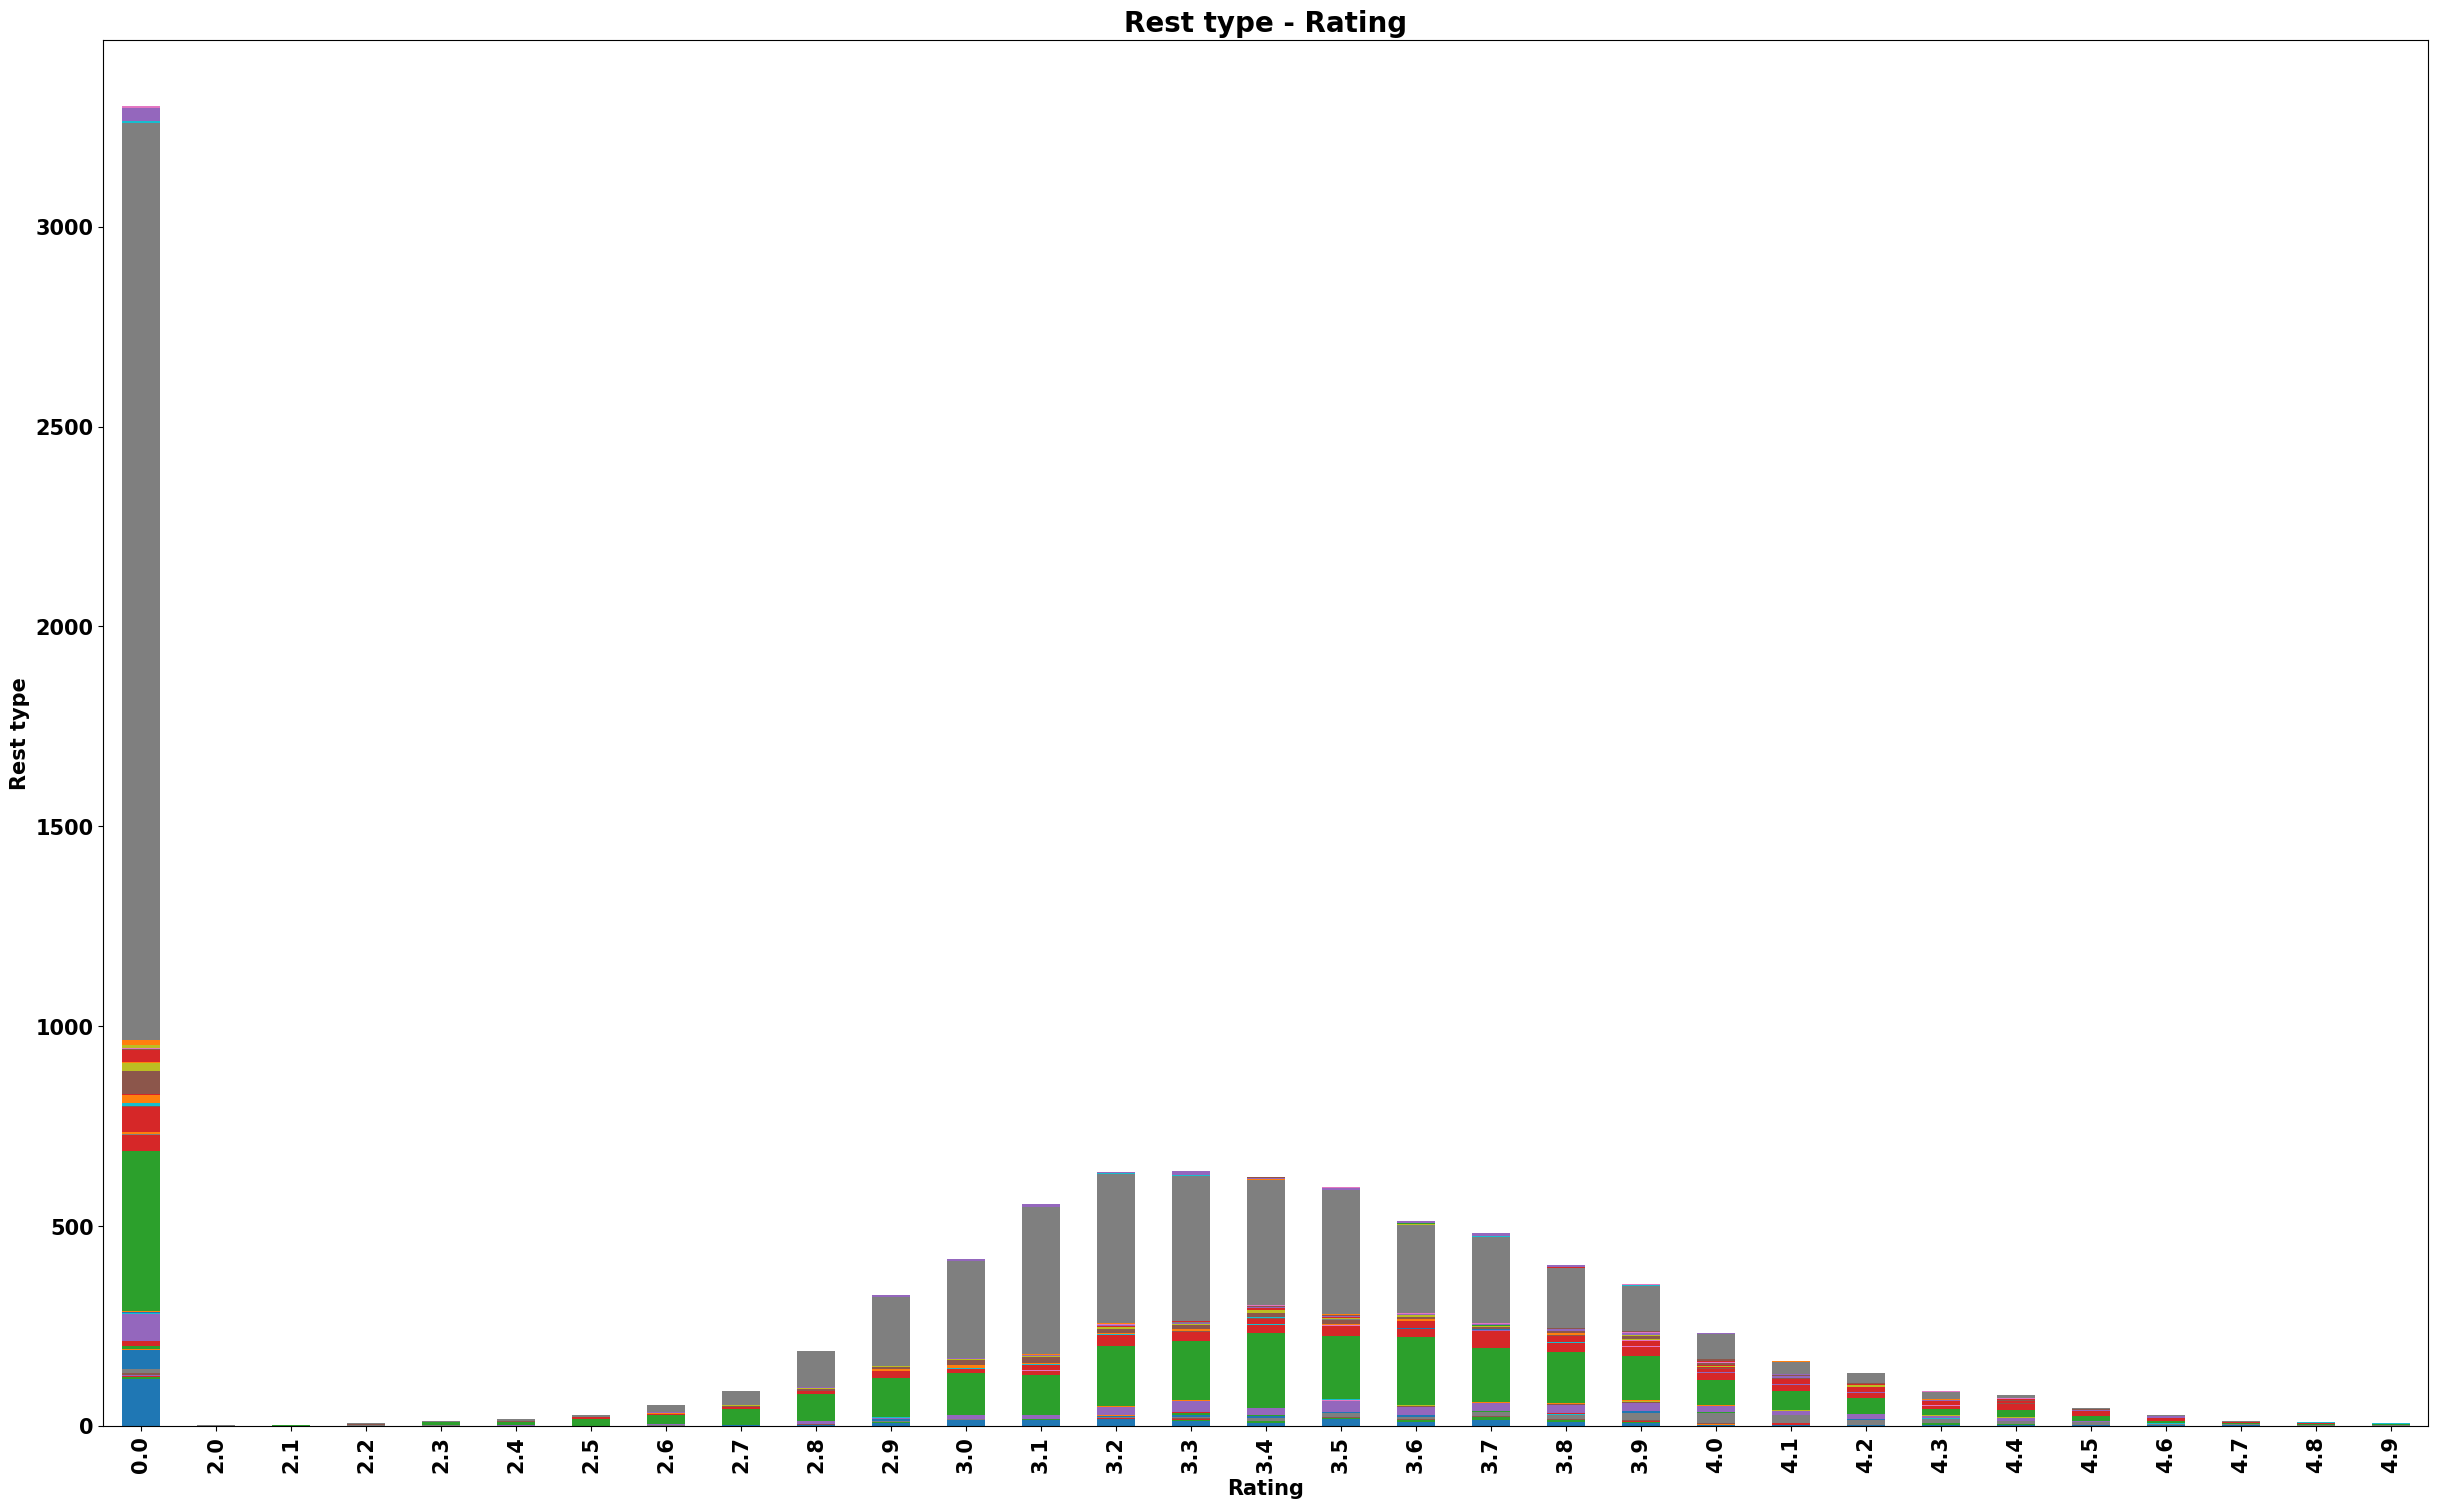

In [36]:
loc_plt=pd.crosstab(df['Ratings'],df['Sponsored'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Rest type - Rating', fontsize=20,fontweight='bold')
plt.ylabel('Rest type', fontsize=15,fontweight='bold')
plt.xlabel('Rating', fontsize=15,fontweight='bold')
fig = plt.gcf()
fig.set_size_inches(30,18)
plt.xticks(fontsize=15,fontweight='bold')
plt.yticks(fontsize=15,fontweight='bold');
plt.legend().remove();

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 [Text(0, 0.0, '0'),
  Text(0, 500.0, '500'),
  Text(0, 1000.0, '1000'),
  Text(0, 1500.0, '1500'),
  Text(0, 2000.0, '2000'),
  Text(0, 2500.0, '2500'),
  Text(0, 3000.0, '3000'),
  Text(0, 3500.0, '3500')])

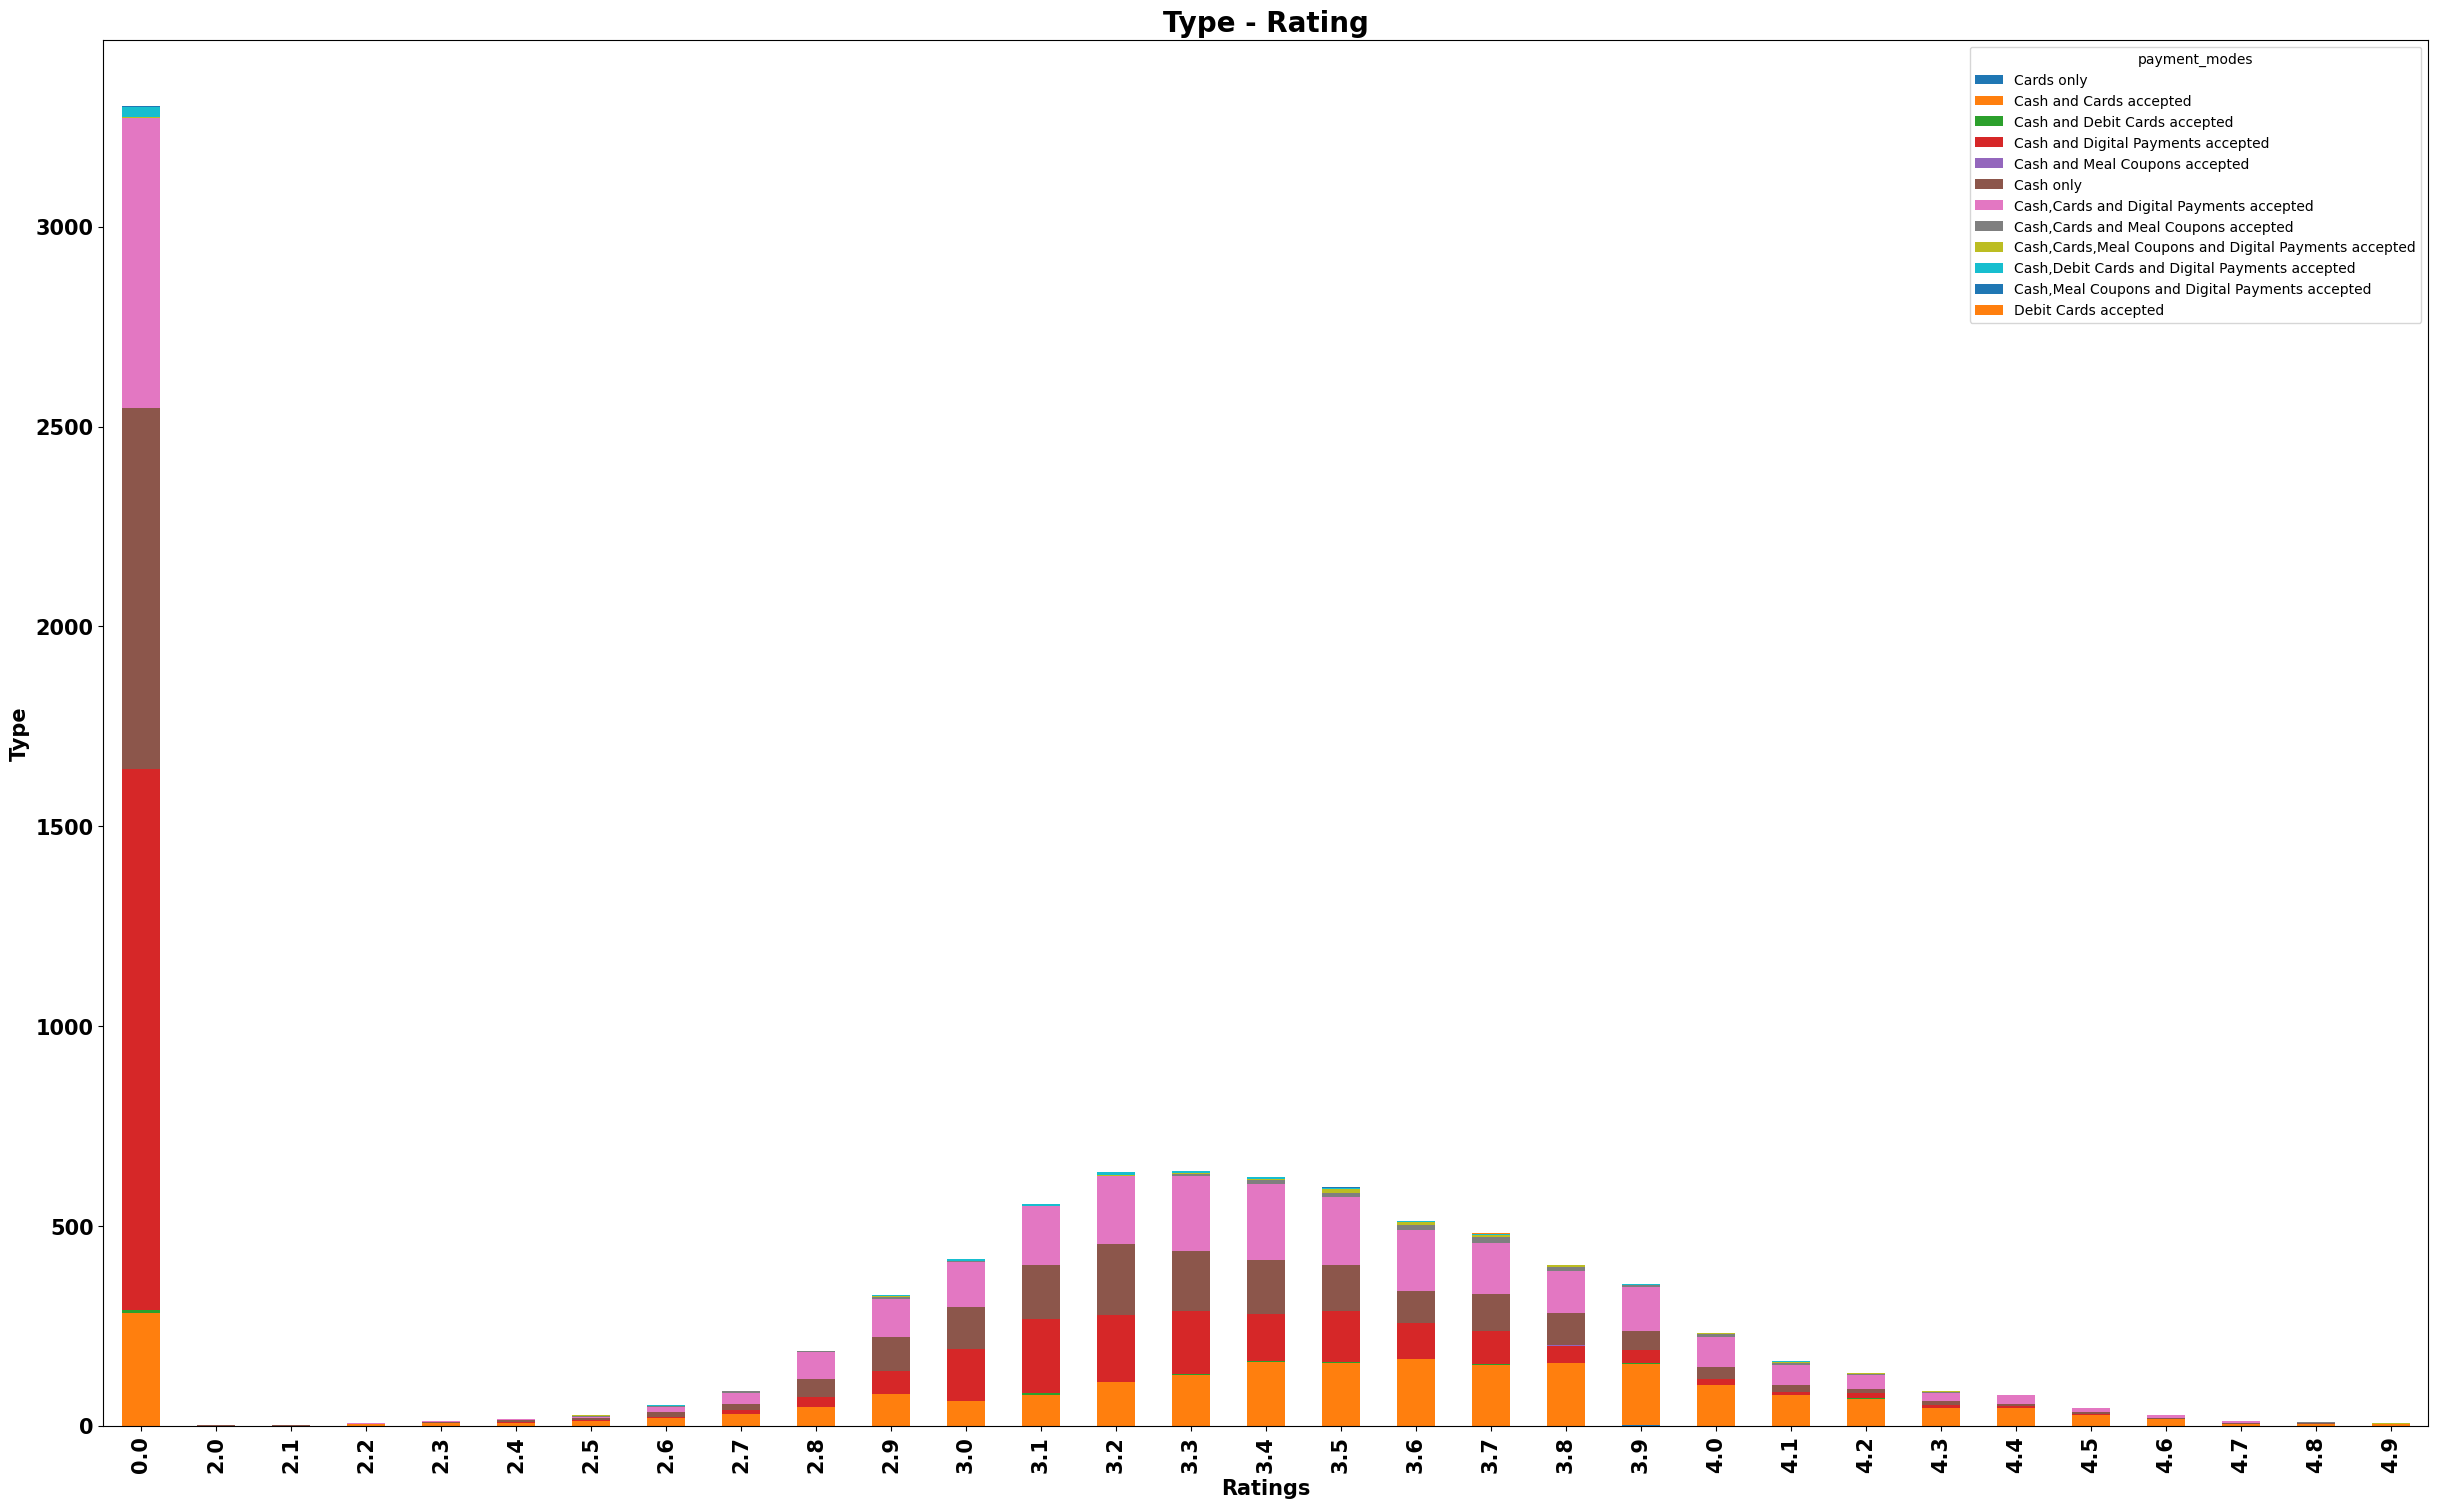

In [37]:
type_plt=pd.crosstab(df['Ratings'],df['payment_modes'])
type_plt.plot(kind='bar',stacked=True);
plt.title('Type - Rating',fontsize=20,fontweight='bold')
plt.ylabel('Type',fontsize=15,fontweight='bold')
plt.xlabel('Ratings',fontsize=15,fontweight='bold')
fig = plt.gcf()
fig.set_size_inches(30,18)
plt.xticks(fontsize=15,fontweight='bold')
plt.yticks(fontsize=15,fontweight='bold')

Text(0.5, 1.0, 'No of Restaurants in a Location')

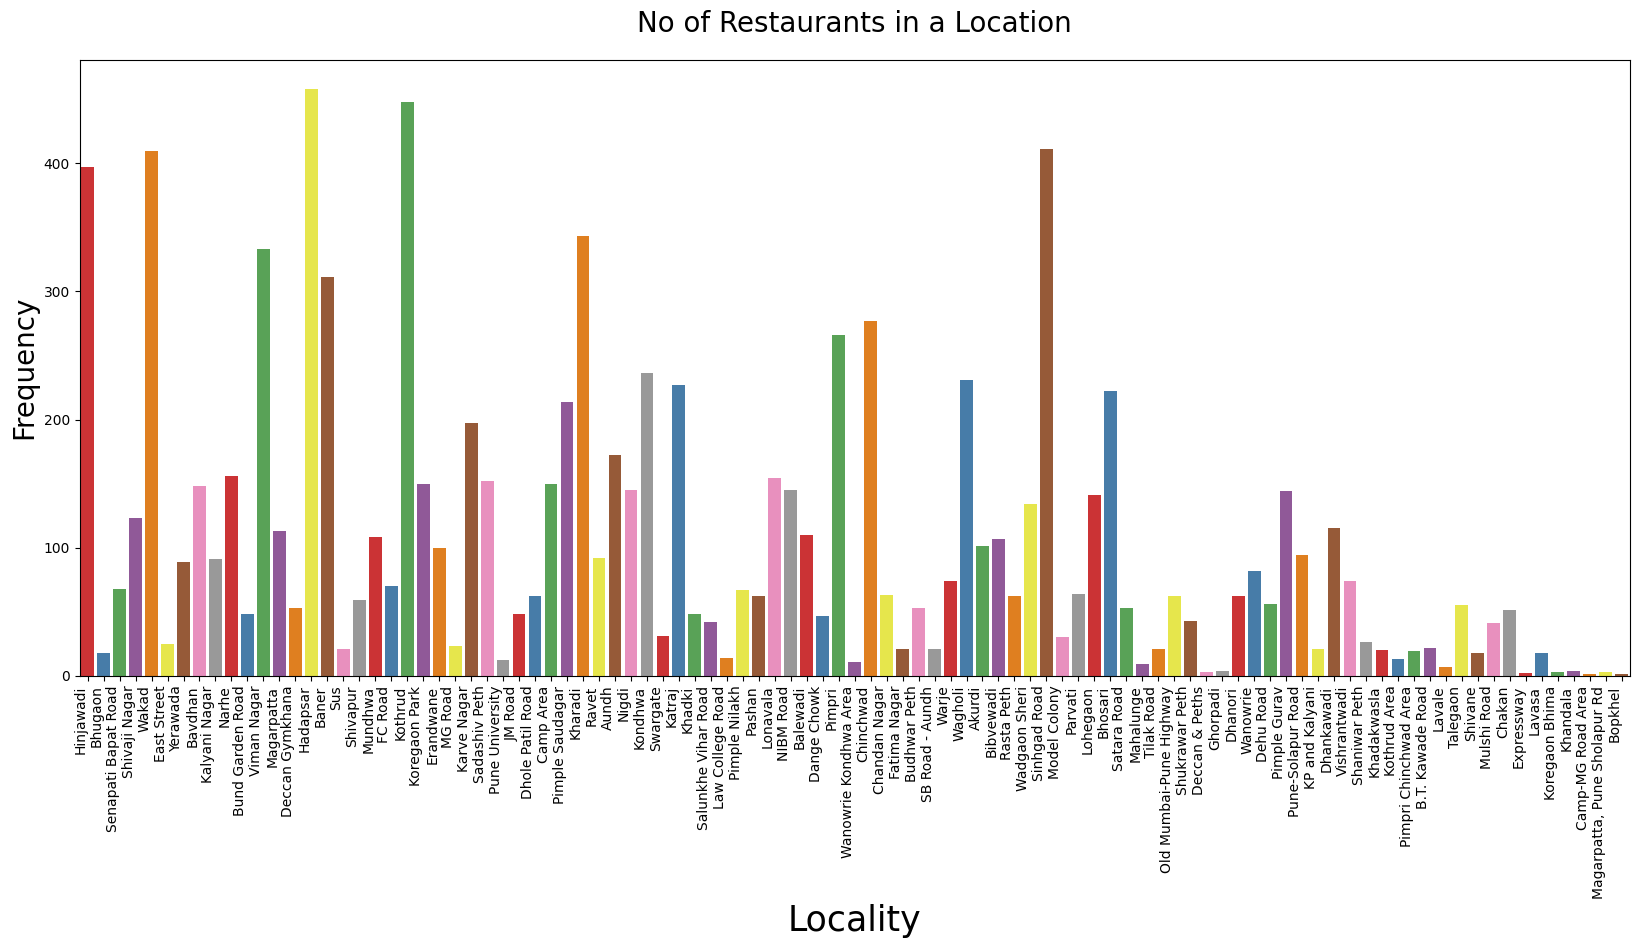

In [38]:
fig = plt.figure(figsize=(20,8))
loc = sns.countplot(x="Locality",data=df,palette="Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=20)
plt.xlabel("Locality",size=25)
loc
plt.title('No of Restaurants in a Location',size = 20,pad=20)

In [39]:
#Most Liked Dishes
import re

df.index=range(df.shape[0])
likes=[]
for i in range(df.shape[0]):
    array_split=re.split(',',df['Cuisines'][i])
    for item in array_split:
        likes.append(item)

In [40]:
favourite_food = pd.Series(likes).value_counts()
favourite_food.head(30)

North Indian      3305
 Chinese          2638
 North Indian     1519
 Fast Food        1348
Fast Food         1114
Chinese           1051
 Beverages         799
Maharashtrian      686
 South Indian      666
Street Food        592
 Mughlai           550
 Street Food       523
 Maharashtrian     517
South Indian       419
 Desserts          413
 Continental       404
 Seafood           376
 Biryani           362
Biryani            358
Cafe               354
Bakery             346
 Italian           329
Desserts           180
 Malwani           175
 Kebab             147
 Asian             130
Ice Cream          127
Continental        124
 Pizza             120
 Sandwich          115
dtype: int64

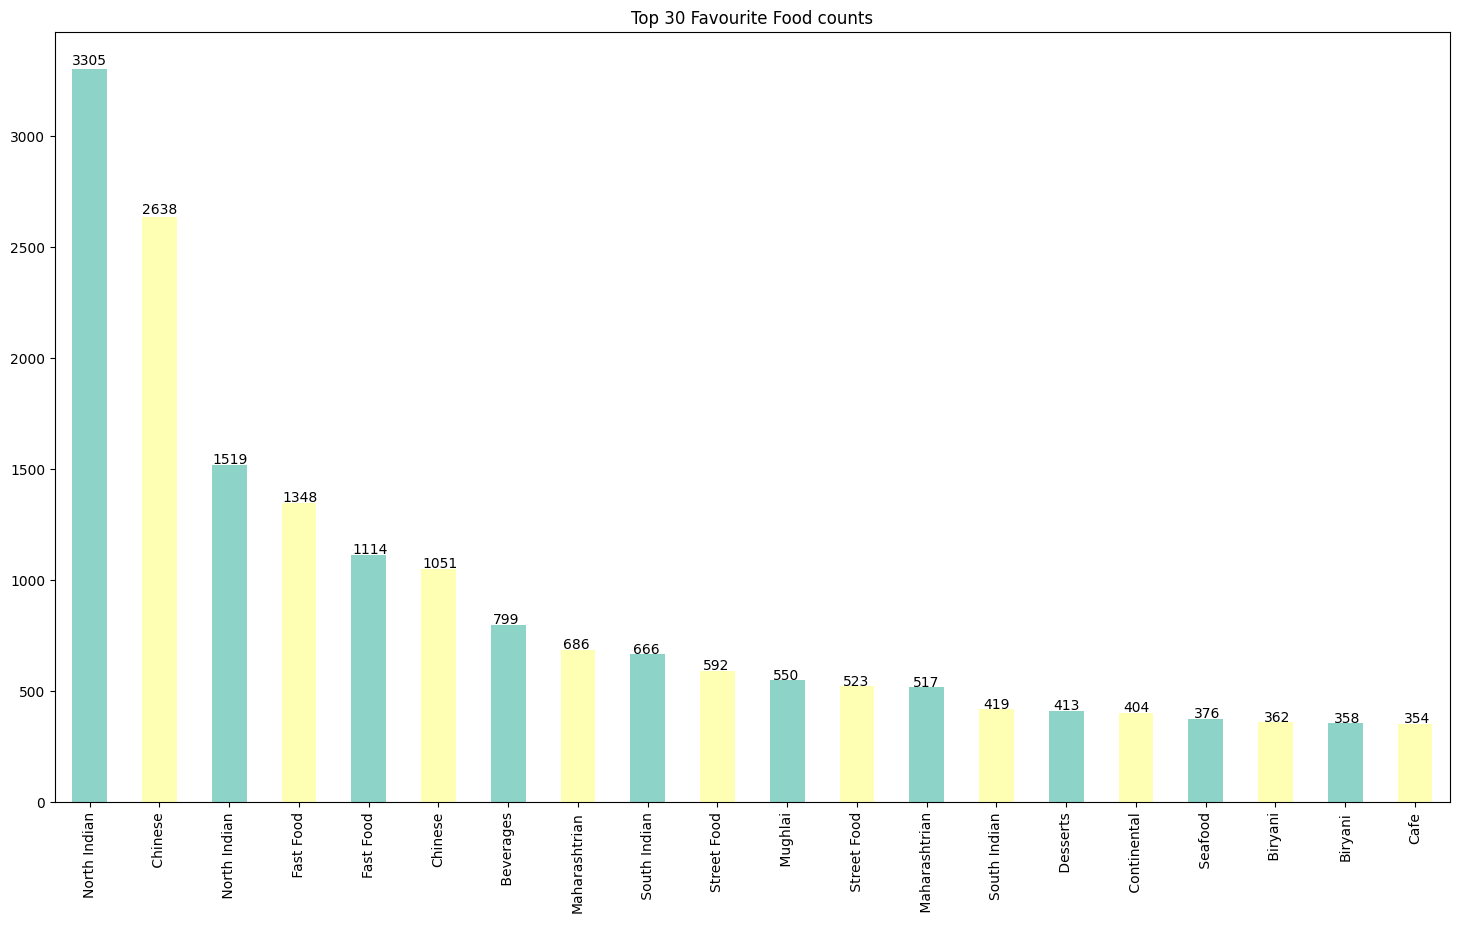

In [41]:
v = df['Table reservation required'].value_counts()
cmap = plt.get_cmap('Set3')
color = cmap(np.arange(len(v)))

ax = favourite_food.nlargest(n = 20, keep = 'first').plot(kind = 'bar', figsize = (18,10), title=  'Top 30 Favourite Food counts', color =  color)

for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() * 1.005, i.get_height() * 1.005))

# **Insights**

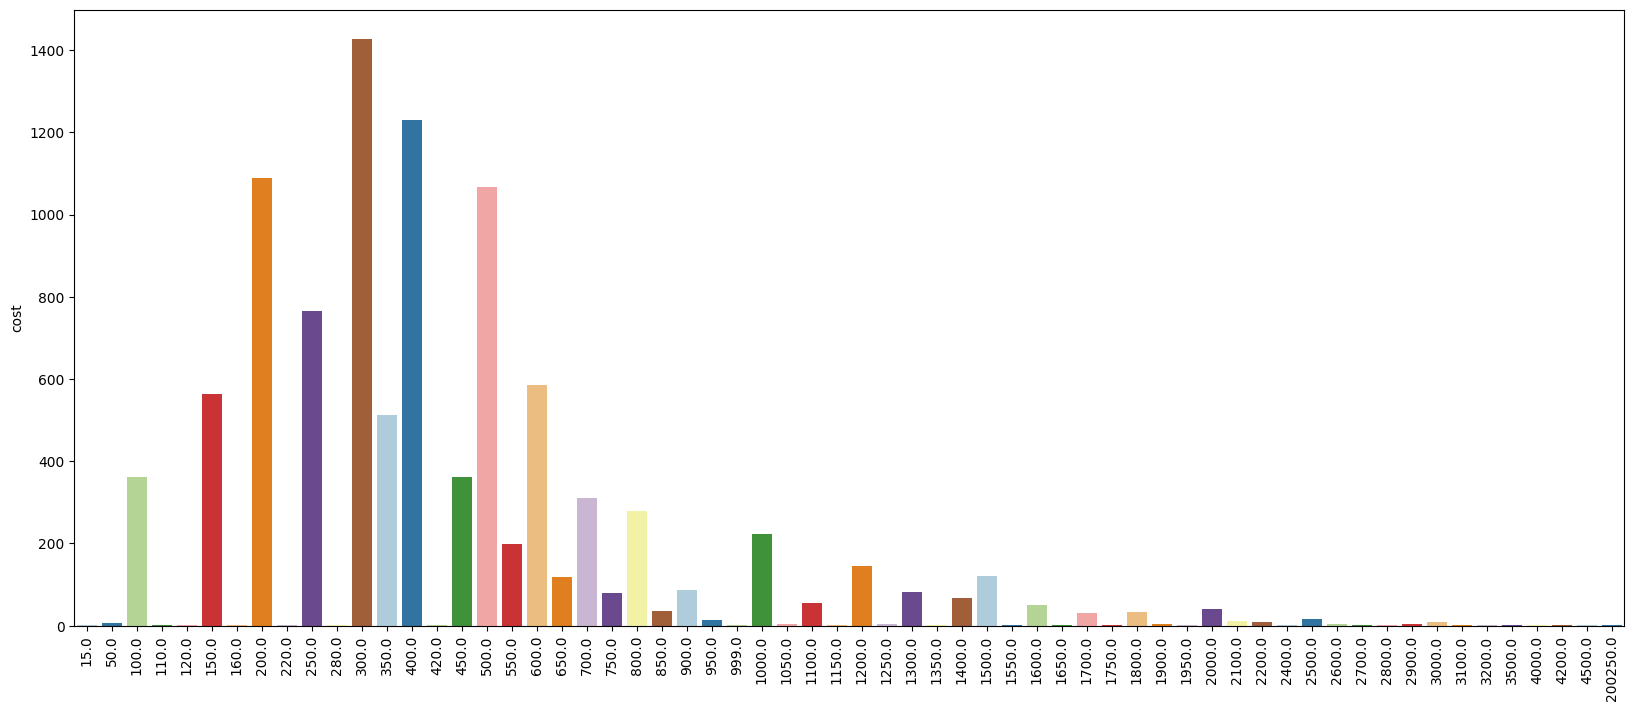

In [42]:
# most common price for two person is 300 in pune restaurants.
v = df['cost'].value_counts()
plt.figure(figsize = (20,8))

sns.barplot(x = v.index, y = v, palette = 'Paired')
plt.xticks(rotation  =90)
plt.show()

In [43]:
df['Number of votes'] = df['Number of votes'].str.replace(' votes','')
df['Number of votes'] = df['Number of votes'].str.replace('Based on ','')
df['Number of votes'] = df['Number of votes'].str.replace('  votes','')
df['Number of votes'] = df['Number of votes'].str.replace('Na základě ','')
df['Number of votes'] = df['Number of votes'].str.replace('Na základe ','')
df['Number of votes'] = df['Number of votes'].str.replace(' hlasů','')
df['Number of votes'] = df['Number of votes'].str.replace('hlasov ','')
df['Number of votes'] = df['Number of votes'].str.replace(' hlasov','')
df['Number of votes'] = df['Number of votes'].str.replace('com base em ','')
df['Number of votes'] = df['Number of votes'].str.replace(' votos','')
df['Number of votes'] = df['Number of votes'].str.replace(' głosów','0')
df['Number of votes'] = df['Number of votes'].str.replace(' votos','0')
df['Number of votes'] = df['Number of votes'].str.replace('Na základe hlasov ','0')
df['Number of votes'] = df['Number of votes'].astype(int)


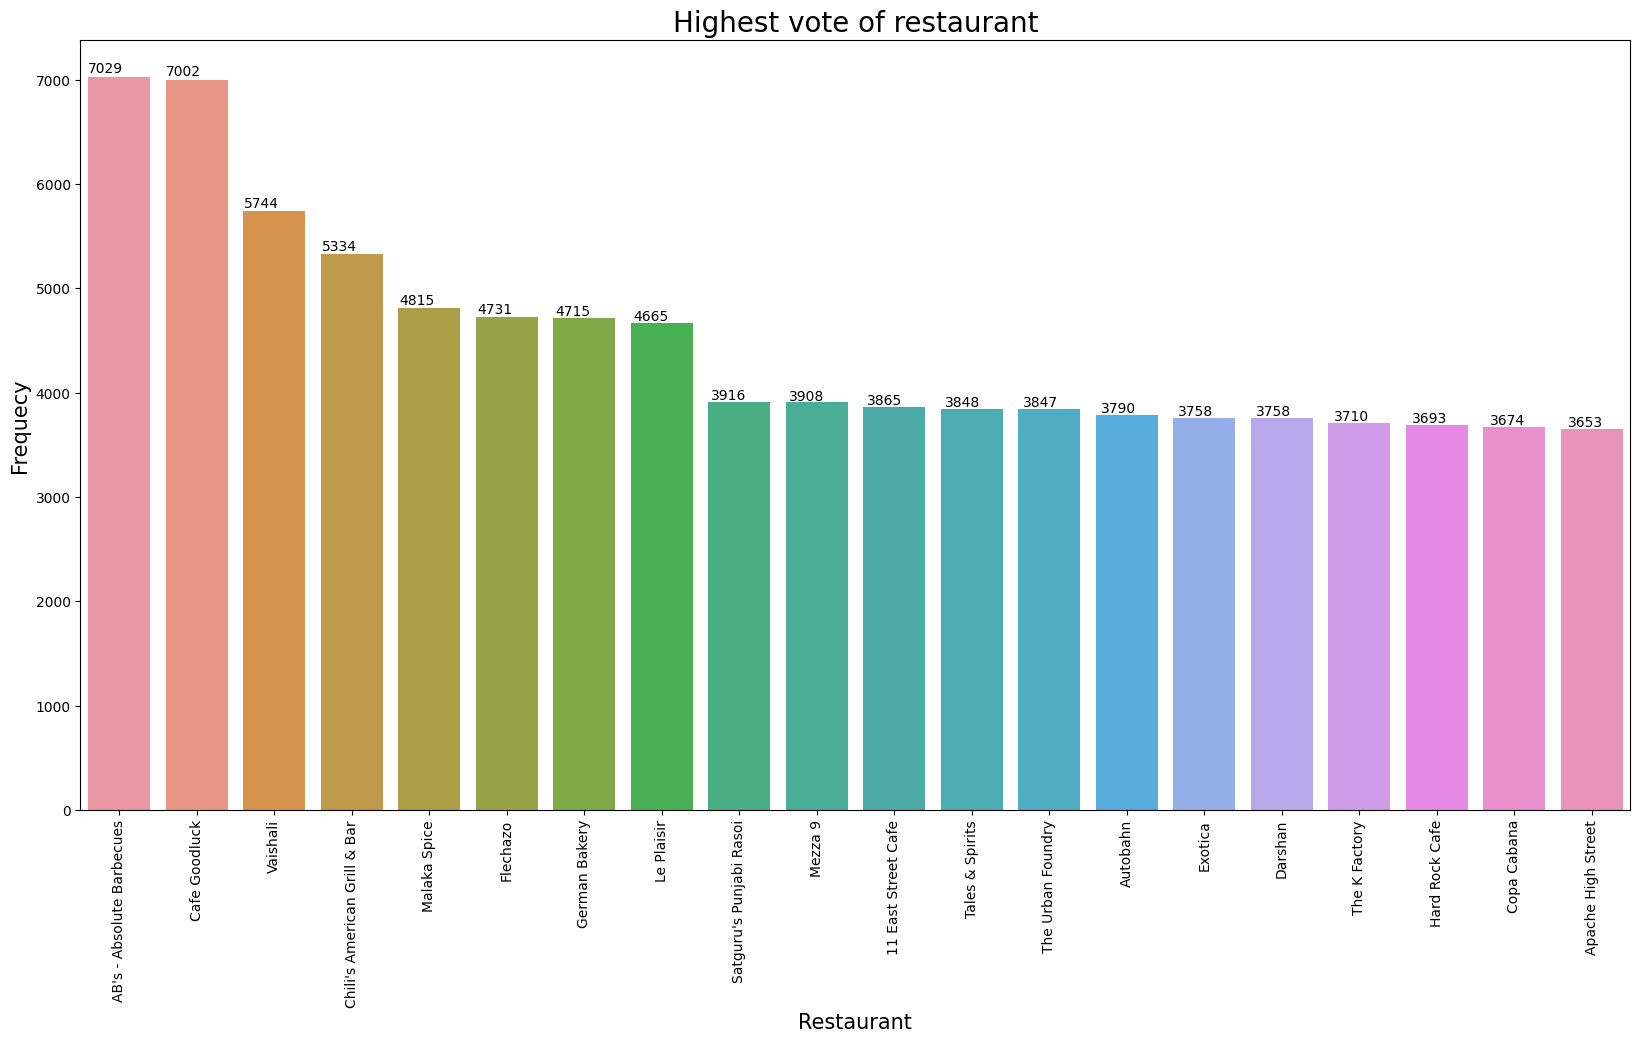

In [44]:
name_grp = df.groupby('Restaurant_Name')
v = name_grp['Number of votes'].agg(np.sum).sort_values(ascending = False)[:20]  ## Here i selected 20 restaurant based on high votes

plt.figure(figsize = (20,10))
ax = sns.barplot(y = v, x = v.index)

for i in ax.patches:
    ax.annotate(i.get_height().astype(int), (i.get_x()* 1.005, i.get_height()*1.005))


plt.title('Highest vote of restaurant', fontsize = 20)
plt.xlabel('Restaurant', fontsize = 15)
plt.ylabel('Frequecy', fontsize = 15)
plt.xticks(rotation =90)
plt.show()

In [45]:
df['Home Delivery'].value_counts()

1    7007
0    3019
Name: Home Delivery, dtype: int64

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Locality'] = le.fit_transform(df.Locality)
df['Sponsored'] = le.fit_transform(df.Sponsored)
df['Cuisines'] = le.fit_transform(df.Cuisines)
df['Lunch Menu'] = le.fit_transform(df['Lunch Menu'])

df.book_table = le.fit_transform(df['Table booking recommended'])

In [47]:
data = df[['Restaurant_Name','Home Delivery','Table booking recommended','Ratings','Number of votes','Locality','Sponsored','Cuisines','Lunch Menu','cost','Lunch Menu']]

In [48]:
my_data = data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]]

my_data.to_csv('Zomata.csv')

In [49]:
my_data.head()

,Restaurant_Name,Home Delivery,Table booking recommended,Ratings,Number of votes,Locality,Sponsored,Cuisines,Lunch Menu,cost,Lunch Menu
0,AB's - Absolute Barbecues,0,1,4.9,7029,31,22,686,0,1400.0,0
1,Cafe Co2 Resto Lounge,0,1,4.6,2578,7,56,1428,0,1500.0,0
2,Paasha - JW Marriott Pune,0,1,4.6,3291,77,43,1725,0,2500.0,0
3,I Amsterdam,0,1,4.3,430,31,23,53,0,1400.0,0
4,FC Road Social,1,0,4.5,2138,79,7,1400,0,1500.0,0


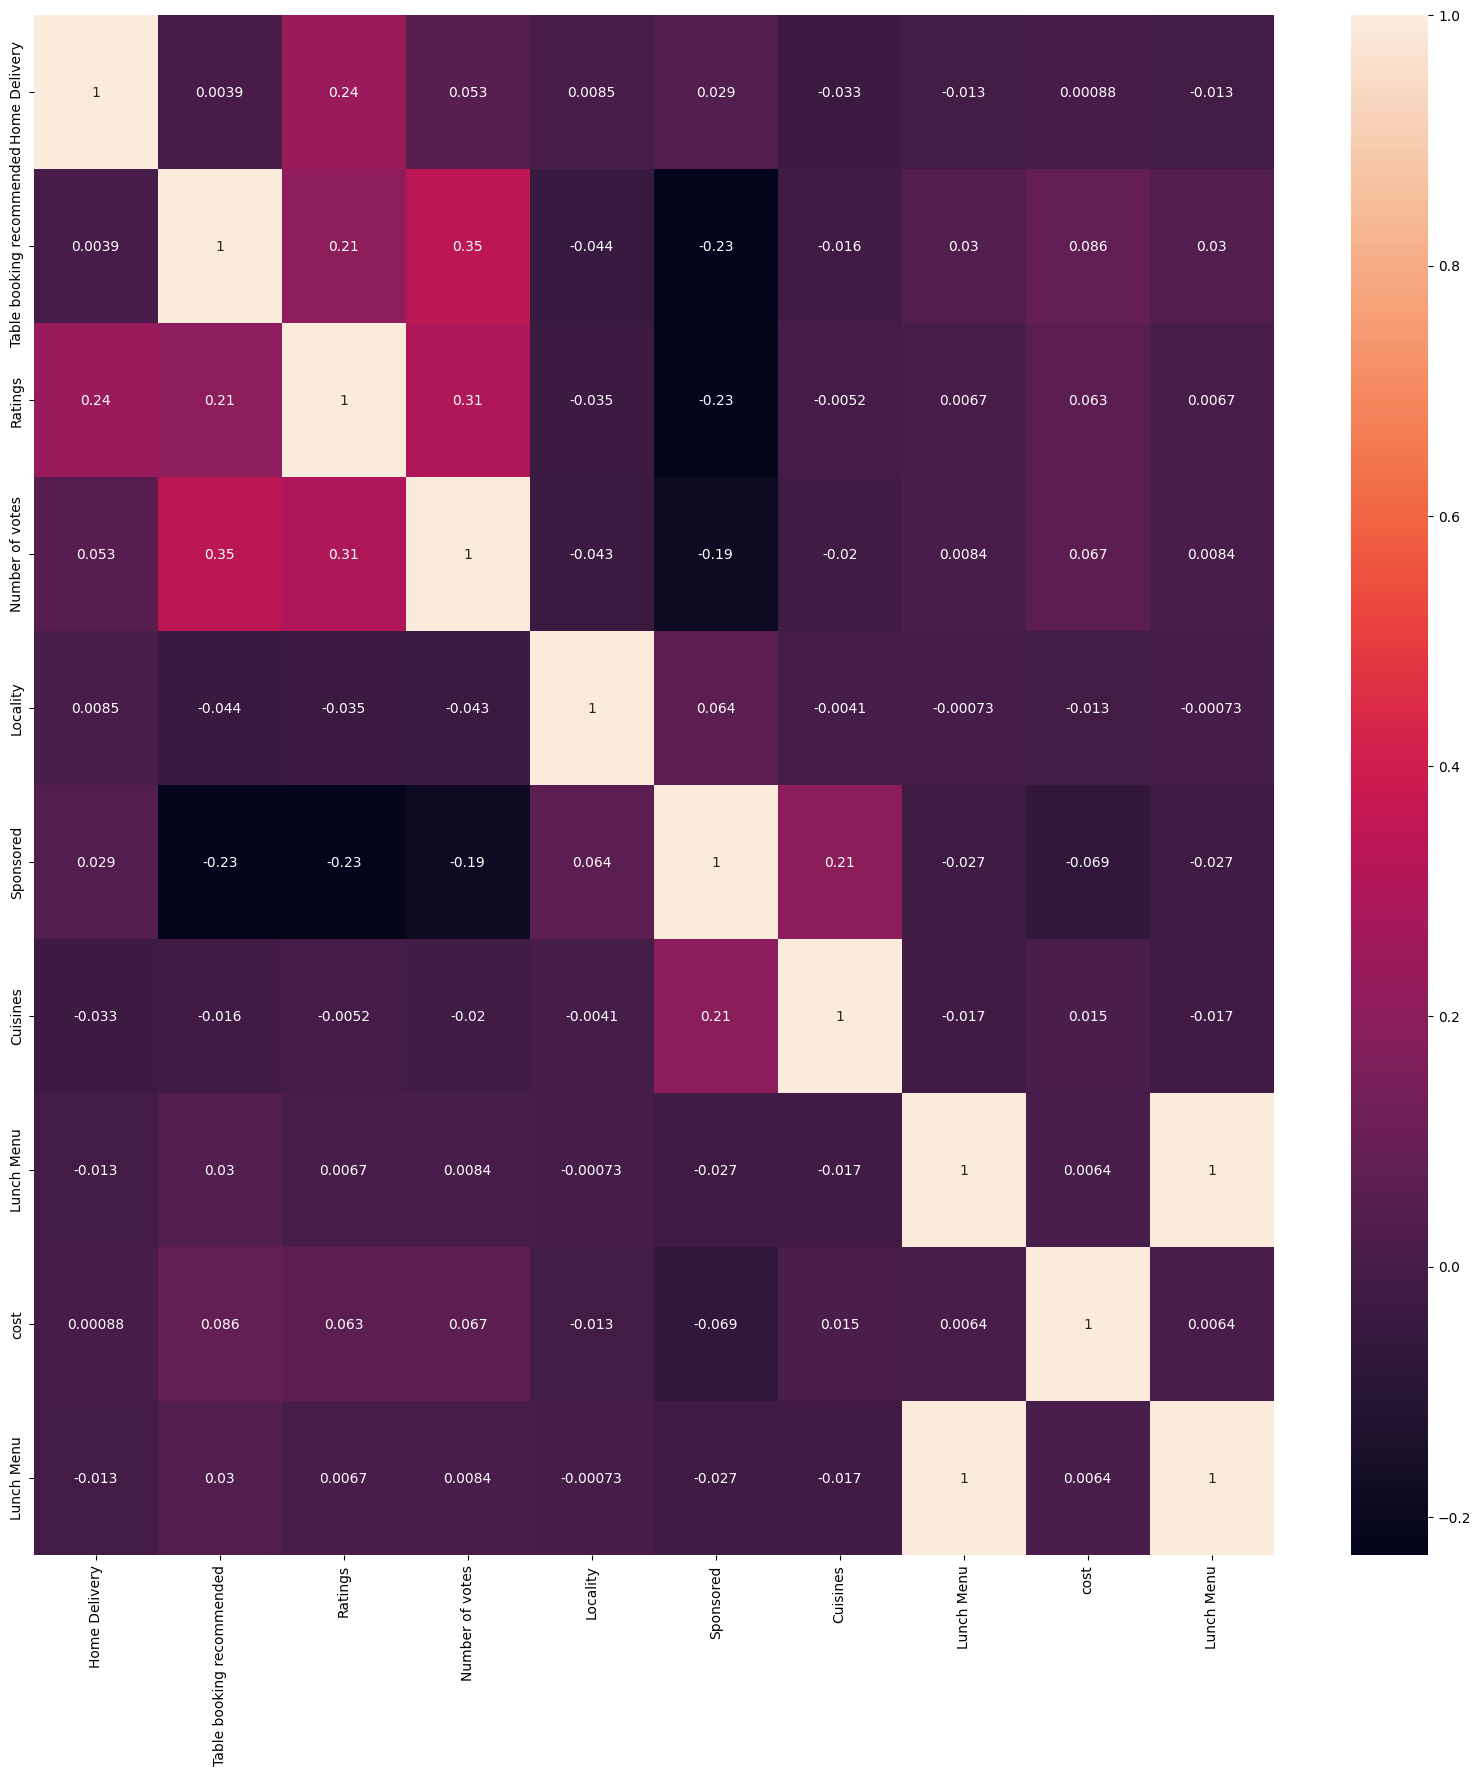

In [50]:
plt.figure(figsize = (20,20))
sns.heatmap(my_data.corr(), annot = True)
plt.show()

# Here from the above we can see that Table Booking Recommended is higly correlated with votes.**bold text**

In [51]:
y = my_data['Table booking recommended']

In [52]:
x = data.iloc[:,[1,3,4,6,7,8,9,10]]
x


,Home Delivery,Ratings,Number of votes,Sponsored,Cuisines,Lunch Menu,cost,Lunch Menu
0,0,4.9,7029,22,686,0,1400.0,0
1,0,4.6,2578,56,1428,0,1500.0,0
2,0,4.6,3291,43,1725,0,2500.0,0
3,0,4.3,430,23,53,0,1400.0,0
4,1,4.5,2138,7,1400,0,1500.0,0
...,...,...,...,...,...,...,...,...
10021,0,0.0,0,67,2059,0,200.0,0
10022,1,0.0,0,67,1495,0,600.0,0
10023,1,0.0,0,67,2120,0,300.0,0
10024,0,0.0,0,23,1676,0,1200.0,0


In [53]:
y

0        1
1        1
2        1
3        1
4        0
        ..
10021    0
10022    0
10023    0
10024    1
10025    0
Name: Table booking recommended, Length: 10026, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=1)

In [55]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=650,random_state=245,min_samples_leaf=.0001)
rfr.fit(X_train,y_train)

# Predict the test ser
y_pred  = rfr.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import r2_score

print(r2_score(y_test,y_pred))

0.3555596961530363


In [56]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

#predict the test set
y_pred = lr.predict(X_test)

## Evaluate the model
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.15060348092037934


In [57]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(min_samples_leaf=0.01)

dtr.fit(X_train,y_train)

# Predict the test ser
y_pred  = dtr.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import r2_score

print(r2_score(y_test,y_pred))

0.33265325874170115


In [58]:
from sklearn.svm import SVR
svr = SVR(kernel ='rbf')

svr.fit(X_train, y_train)

# predict the test set
y_pred = svr.predict(X_test)

# Evaluate the performance
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.1446174001539715


In [59]:
mylist = df.columns.values.tolist()

print(mylist)

['Restaurant_Name', 'Locality', 'Sponsored', 'Ratings', 'Number of votes', 'Cuisines', 'cost', 'payment_modes', 'Rest_timming', 'Detail_address', '5_star_review_percentage', '4_star_review_percentage', '3_star_review_percentage', '2_star_review_percentage', '1_star_review_percentage', 'Wine and Beer', 'Dance Floor', 'Lunch Menu', 'Outdoor Seating', 'Seaside', '4/5 Star', 'Free Parking', 'Pet Friendly', 'Bulk Orders Accepted', 'Gaming Are', 'City View', 'Vegetarian Only', 'Brunch', 'Live Music', 'Home Delivery', 'Celebrity Frequented', 'Pre-Ordering Required', 'Pool Table', 'Keto Options', 'Wifi', 'Wine Tasting', 'Beer', 'Restricted Entry', 'Variable Menu', 'Serves Non Veg', 'Table booking for Groups', 'Home Baker', 'Wine', 'Buffet', 'Board Games', 'Vegan Options', 'Table reservation required', 'Rooftop', 'BYOB', 'Egg Preparations', 'Luxury Dining', 'Seating Not Available', 'Desserts and Bakes', 'Card Upon Delivery', 'Serves Jain Food', 'Mall Parking', 'Gastro Pub', 'Live Entertainment'

In [60]:
my_data = df.iloc[:,[2,3,4,5,6,7,9,10,12]]